<font face="XB Zar" size=5><div dir=rtl align=center>
<font face="XB Zar" size=5>
به نام خدا
</font>
<br> <br>
<font size=3>
دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
</font>
<br> <br>
<font color=blue size=5>
مقدمه‌ای بر یادگیری ماشین
</font>

<hr/> <br>
<font color=red size=6>
فصل سوم: یادگیری، ارزیابی و تنظیم‎کردن مدل‎ها 
<br>
</font>
<br>
نویسندگان: <br> 
<br>علیرضا گرگوری مطلق، پیمان ناصری، علیرضا حیدری
<hr>
</div></font>

<font face="XB Zar" size=4><div dir=rtl>
در این فصل قصد داریم که به معرفی مفاهیم پایه‌ای و البته مهمی در یادگیری ماشین بپردازیم. تمرکز ما برای معرفی مفاهیم مرتبط، مدل **ماشین‌های بردار پشتیبان** 
(Support Vector Machines)
می باشد؛ در ابتدا به پیاده‌سازی مدل ساده‌شده‌ای از SVM پرداخته و سپس به معرفی کتابخانه
Scikit-Learn
که یکی از مهمترین و قدرتمندترین کتابخانه‌های موجود در زمینه یادگیری ماشین است میپردازیم.
در ادامه با استفاده از ماژول‌های این کتابخانه مدل‌های پیچیده‌تری را پیاده‌سازی خواهیم کرد و نحوه ارزیابی و انتخاب مدل‌های مناسب را بر اساس معیارهای مدنظرمان فرا خواهیم گرفت.
<br> <br>
پیش از شروع بحث بهتر است به معرفی ابرصفحه (Hyperplane) و نیز حاشیه (Margin) بپردازیم.
<br><b> (در سراسر این فصل فرض می‌شود که $N$ تعداد نمونه‌های ما و $p$ تعداد ویژگی‌های هر نمونه می‌باشد.) 

<font face="XB Zar" size=4><div dir=rtl>
<font color="red" size=5>ابرصفحه</font>
<br> <br>
یک ابرصفحه در فضای *p*بعدی در واقع زیرفضایی affine از بعد *p-1* می باشد.
معادله زیر بیان کننده یک ابرصفحه در فضای *p*بعدی میباشد:  
<br><center> $f(X) = b + w_1X_1 + w_2X_2 + ... + w_pX_p = w^T X + b = 0 $
</div></font>
    
<font face="XB Zar" size=4><div dir=rtl>
<br>در معادله بالا بردار $w = (w_1, w_2, ..., w_p)^T $ بردار نرمال بر ابرصفحه مذکور است و در واقع نشانگر جهتی میباشد که بر ابرصفحه عمود است. به این بردار، بردار وزن نیز می‌گویند که در ادامه دلیل آن مشخص خواهد شد.
    همچنین b نیز عرض‌ازمبدا(intercept) ابرصفحه می‌باشد که از آن با نام بایاس نیز یاد می‌شود.
</div></font>
    
    
<div>
<center>
<img src="resources/hyperplane.png" width="800">
</center>
</div>

    
<font face="XB Zar" size=4><div dir=rtl>
<br> همانطور که مشاهده میکنیم، در فضای 2 بعدی ابرصفحه خط راستی با شیب $w_1$ و عرض از مبدا $b$ می باشد و در فضای 3 بعدی نیز، یک ابرصفحه در واقع همان صفحه است. در ابعاد بالاتر نیز با تعمیم این صفحه، دارای ابرصفحه‌ای خواهیم بود که بردار $w$ بر آن عمود می باشد و فضای
*$p$*-بعدی را به 2 نیم فضا تقسیم میکند؛ به گونه‌ای که در یک سمت این ابرصفحه، 
$f(X) > 0$ است و در سمت دیگر آن $f(X) < 0$ خواهد بود.
</div></font>

    
<font face="XB Zar" size=4><div dir=rtl>
<br> حال مسئله‌ای را در نظر بگیرید که میخواهیم داده‌های دو کلاس را از یکدیگر تفکیک کنیم. در صورتی که بتوانیم ابرصفحه مناسبی را پیدا کنیم که داده‌های هر کلاس در یک طرف این ابرصفحه قرار بگیرند، و برچسب کلاس‌های هر گروه را به صورت $Y^{(i)} \in \{\pm 1\}$ کدگذاری کنیم، برای هر نمونه معادله زیر برقرار خواهد بود:
<br> <center> $ Y^{(i)}f(X^{(i)}) > 0 \quad \forall i \in \{1,2,...,N\} $
</div></font>
    
<font face="XB Zar" size=4><div dir=rtl>
<br>در شکل زیر نمونه‌ای از یک صفحه جداکننده دو کلاس در فضای 2بعدی نمایش داده شده است:
</div></font>
    
<div>
<center>
<br>
<img src="resources/possible_hyperplane.png" width="400">
</center>
</div>
    
    
<font face="XB Zar" size=4><div dir=rtl>
<font color="red" size=5>حاشیه (Margin)</font>
<br>
<br> یک راه‌حل معقول برای جداسازی داده‌های دو کلاس، پیدا کردن ابرصفحه‌ای است که بیشترین حاشیه (Margin) را نسبت به داده‌های دو کلاس داشته باشد؛
    منظور از حاشیه فاصله این ابرصفحه از نزدیک‌ترین داده هر کلاس است:
</div></font>

<div>
<center>
<br>
<img src="resources/possible_hyperplane_margin.png" width="400">
</center>
</div>

<font face="XB Zar" size=4><div dir=rtl>
<center><font color="red" size=6>طبقه‌بند بیشینه‌نمای حاشیه (Maximal Margin Classifier)</font></center> <br>
<br>از آنجا که هر ابرصفحه جداکننده‌ای را می‌توان با انتقال یا چرخش کوچکی به ابرصفحه دیگری تبدیل نمود که همچنان تمایزدهنده دو کلاس است، بی‌نهایت ابرصفحه میتواند جواب مسئله ما باشد؛ پس باید بتوانیم ابرصفحه‌ای که به طور متقارن از هر دو کلاس بیشینه فاصله را دارد، پیدا نماییم؛ به این ابرصفحه، **ابرصفحه جداکننده بهینه** 
(Optimal Separating Hyperplane)
یا **ابرصفحه جداکننده بیشینه**
(Maximal Separating Hyperplane)
میگوییم.
</div>

<div>
<center>
<br>
<img src="resources/possible_hyperplanes.png" width="400">
</center>
</div>

<font face="XB Zar" size=4><div dir=rtl>
<br> <br>
بنابراین مسئله ما پیدا کردن ابرصفحه‌ای شده است که حداکثر حاشیه ممکن از دو کلاس را داشته باشد؛ می‌توان به این مسئله به چشم پیدا کردن دو ابرصفحه دیگر 
$(\mathcal{H}_1, \mathcal{H}_2)$ 
که فاصله برابر و بیشینه‌ای از ابرصفحه مطلوب ما
$\mathcal{H}_0$
دارند نیز نگاه کرد؛ به طوری که داده‌های دو کلاس در دو سمت متفاوت 
$\mathcal{H}_0$
قرار بگیرند و هیچ نمونه‌ای نیز در فضای بین آن‌ها نیفتد.
شکل زیر بیانگر مطالب بالا می‌باشد:
</div>

<div>
<center>
<br>
<img src="resources/extermum_hyperplanes.png" width="400">
</center>
</div>


<div dir=rtl>
<br>بدون از دست دادن کلیت مسئله، می‌توان دو صفحه 
$(\mathcal{H}_1, \mathcal{H}_2)$ 
را به صورت زیر تعریف نمود:  
<br><center>  $\mathcal{H}_1: \quad w^T x^{(i)} + b \geq 1 \qquad if \quad y^{(i)}=1 $
<br><center>  $\mathcal{H}_2: \quad w^T x^{(i)} + b \leq -1 \qquad if \quad y^{(i)}=-1 $
</div>
    
<font face="XB Zar" size=4><div dir=rtl>
<br>دو معادله بالا را می‌توان با یکدگیر ترکیب نمود و به صورت زیر نوشت:
<br><center> $y^{(i)}(w^T x^{(i)} + b) \geq 1 \quad \forall i \in \{1,2,...,N\} $
</div></font>
    
    
<div dir=rtl>
<br>حال باید فاصله بین دو صفحه
$(\mathcal{H}_1, \mathcal{H}_2)$ 
را پیدا کنیم تا بتوانیم با بیشینه کردن آن، صفحه
$\mathcal{H}_0$
را به صورت ابرصفحه‌ای موازی با آنها که این فاصله را به دو قسمت برابر تقسیم میکند، مشخص نماییم.
<br> <br>
یک راه توصیف حاشیه می‌تواند اینگونه باشد که حاشیه را برداری عمود بر دو ابرصفحه مذکور در نظر گرفت که اندازه این بردار برابر با مقدار حاشیه خواهد بود. پس با تعریف بردار مناسبی برای توصیف این فاصله، کافی است اندازه آن را پیدا کنیم.
<br>از آنجا که بردار وزن‌های
$w$
 عمود بر ابرصفحه موردنظر ما است، می توان بردار یکه $u$ را برداری هم‌جهت با بردار $w$ در نظر گرفت؛
پس بردار $u$ به صورت زیر می‌باشد:
<br> <center> <font size=5> $ u = \frac{w}{{\lVert w \rVert}_2} $
</div>
    
<div dir=rtl>
<br>حال کافی است بردار $u$ را در مقدار اسکالر $m$ ضرب نمود تا 
بردار $k$ را پیدا کرد که اندازه آن برابر با حاشیه $m$ می‌باشد و در راستای موردنظر نیز خواهد بود:
<br> <center> <font size=5> $ k = m.u = m.\frac{w}{{\lVert w \rVert}_2} $
</div>

<div dir=rtl>
شکل زیر توضیحات بالا را به خوبی ترسیم می‌نماید:
<center>
<img src="resources/scalers.png" width="400">
</center>
</div>
    
    
<div dir=rtl>
حال نقطه‌ی دلخواه $x_0$
را بر روی ابرصفحه
$\mathcal{H}_2$   
در نظر بگیرید و آن را با بردار $k$ جمع کنید تا به نقطه $z_0$ بر روی ابرصفحه 
$\mathcal{H}_1$ برسید.
<center>
<img src="resources/find_k.png" width="400">
</center>
</div>
    
<div dir=rtl>
از آنجا که نقطه $x_0$ بر روی $\mathcal{H}_2$ و $z_0$ بر روی $\mathcal{H}_1$ قرار گرفته‌اند، پس در معادلات زیر صدق می‌کنند:
<br> <center> $w^T z_0 + b = 1 $
<br> <center> $w^T x_0 + b = -1 $
</div>
    
<div dir=rtl> <br>
با کم کردن دو معادله بالا از یکدیگر خواهیم داشت:
<br> <center> $w^T (z_0 - x_0) = 2$
</div>

<div dir=rtl> <br>
از طرفی $z_0 = x_0 + k$ می‌باشد؛ پس
<br> <center> $w^T k = w^T . m\frac{w}{{\lVert w \rVert}_2} = 2 \Rightarrow $
<br><br> <center> $ m.\frac{{\lVert w \rVert}_2 ^2}{{\lVert w \rVert}_2} = m.{\lVert w \rVert}_2 = 2 \Rightarrow$
<br><br> <center> <font size="5"> $ m = \frac{2}{{\lVert w \rVert}_2} $ <br>
</div>  
    
    
<div dir=rtl> <br>
پس با توجه به نتایج بالا، فاصله بین دو صفحه
$(\mathcal{H}_1, \mathcal{H}_2)$ 
برابر با
$ m = \frac{2}{{\lVert w \rVert}_2} $
می‌باشد و جهت بیشینه کردن این مقدار، باید مخرج آن، یعنی اندازه بردار نرمال را کمینه نمود.
به نمونه‌هایی که بر روی دو صفحه
$(\mathcal{H}_1, \mathcal{H}_2)$ 
قرار میگیرند و در تعیین نمودن ابرصفحه جداکننده بهینه نقش دارند، بردارهای پشتیبان (support vectors) گفته می‌شود. شکل زیر به طور نمادین تمام نتایج بالا را دارا میباشد:
</div>
    
<div> <br>
<center>
<img src="resources/support_vectors.png" width="400">
</center>
</div>
    

<div dir=rtl> <br>
<br> با جمع بندی نتایج و توضیحات بالا، ما به‌دنبال حل کردن مسئله بهینه‎سازی زیر می‌باشیم:
\begin{equation}
    \begin{aligned}
        \min_{w,b} \quad & \frac{1}{2}||w||_2 ^2\\
        \textrm{s.t.} \quad & y^{(i)}(w^T x^{(i)} + b) \geq 1 \quad \forall i \in \{1,2,...,N\}\\
    \end{aligned}
\end{equation}
    
<br><div dir=rtl> (همانطور که می‌دانید کمینه کردن اندازه یک بردار با کمینه کردن توان دو اندازه آن بردار، معادل می‌باشد و برای سادگی محاسبات در ادامه از این نکته استفاده کرده‌ایم!) <br>
(همچنین استفاده از ضریب $\frac{1}{2}$ نیز جهت تسهیل نتایج مشتق گرفتن در ادامه می‌باشد!)
</div>
    
    
    
<div dir=rtl> <br> مسئله مقید بالا یک مسئله بهینه‌سازی محدب می‌باشد و در ادبیات بهینه‌سازی محدب از آن به عنوان برنامه‌نویسی مرتبه دوم 
(Quadratic Programming)
یاد می‌شود. در صورت علاقمندی به مطالعه بیشتر راجع‌به Quadratic Programming می‌توانید به لینک زیر مراجعه نمایید:
<br> <div dir=ltr> <a href="https://en.wikipedia.org/wiki/Quadratic_programming">Quadratic Programming (QP)</a>
</div>

<font face="XB Zar" size=4><div dir=rtl>
    
<div dir=rtl> <br>
با توجه به محدب بودن مسئله بالا، وجود جوابی جهت کمینه کردن تابع هدف تضمین می‌شود؛ پس می‌توان با معرفی تابع هزینه مناسبی برای مسئله بالا، به طوری که عبارت را از حالت مقید خارج سازد، آن را با روش‌های مرسوم بهینه‌سازی همچون Gradient Descent .حل نماییم
</div> <br>
    
    
    
    
<div dir=rtl> <br>    
<font color="red" size=5>معرفی Gradient Descent</font> <br>
در این بخش به طور خلاصه به روش Gradient Descent
که الگوریتمی از خانواده الگوریتم‌های مرتبه اول در بهینه سازی است و جهت پیداکردن کمینه محلی (Local Minimum)
    و در توابع محدب کمینه جهانی (Global Minimum)
به کار می‌رود، اشاره می‌کنیم. در فصل‌های بعد به طور کامل‌تر با این روش آشنا خواهید شد. <br>
این روش ساده از مرسوم‌ترین و پرطرفدارترین روش‌های بهینه‌سازی در یادگیری ماشین و خصوصا یادگیری عمیق می‌باشد.
در واقع با استفاده از این روش ما سعی داریم که تابع هدف(یا در ادبیات یادگیری ماشین، تابع هزینه) خود را کمینه کنیم و پارامترهای بهینه را جهت این هدف پیدا کنیم. <br>
همانطور که می‌دانیم، مشتق تابع در یک نقطه، نمایانگر شیب تابع در آن نقطه و جهتی است که تابع در راستای آن بیشترین افزایش مقدار را دارد؛ بنابراین با حرکت کردن در خلاف جهت مشتق تابع می‌توانیم کمینه مورد نظر را پیدا کنیم. این روش ساده و تعمیم‌های آن مبنای بهینه‌سازی بسیاری از مدل‌های یادگیری ماشین خواهند بود که در ادامه درس خواهید دید.
</div>

<div> <br>
<center>
<img src="resources/ball.png" width="500">
</center>
</div>
    
   
<div dir=rtl> <br> 
فرض کنید هدف ما پیداکردن پارامترهایی است که تابع هزینه 
$J(w)$ را کمینه میکنند؛ یعنی:
<br> <center> $w^{opt} = \underset{w}{\mathrm{argmin}}\hspace{1mm} J(w)$ </div>
    
<div dir=rtl> <br>
بنابراین روش ما برای پیداکردن پارامترهای بهینه به صورت زیر خواهد بود: <br>
<br> 1. پارامترهای موردنظر را مقداردهی اولیه نماییم.(مقداردهی اولیه معمولا به صورت تصادفی خواهد بود، هرچند روش‌های خیلی پیشرفته‌تر و بهتری جهت مقداردهی اولیه وجود دارد.)
<br><br> 2. مقدار و جهت آپدیت پارامترها را به کمک مشتق تابع به ازای آن پارامترها پیدا کنیم:
<br><br> <font size="5"> <center> $\Delta w = -\eta \frac{\partial J(w)}{\partial w}$ <font> </div>
<div dir=rtl> همانطور که از توضیحات بالا مشخص است، این روش یک روش تکرارشونده است و مقدار حرکت در هر گام را با استفاده از پارامتر $\eta$ که از آن به نام ضریب یادگیری (Learning Rate) یاد می‌شود تنظیم میکنیم. 
<br><br> 3. پارامترهای موردنظر را به‌روز نماییم:
<br><br> <font size="5"> <center> $w^{new} = w^{old} + \Delta w$ <font> </div>
<div dir=rtl> <br>
4. مراحل 2و3 را آنقدر تکرار میکنیم تا جایی‌که مشتق تابع هزینه در آن نقطه صفر شود و در نتیجه $w^{new} = w^{old}$. پارامترهای بهینه برابر با این مقدار $w$ می‌باشد. 
</div>
    

<div dir=rtl><br><br> از موارد بسیار مهم در این روش تنظیم مقدار ضریب یادگیری $\eta$  می‌باشد؛
همانطور که گفته شد، انداره حرکت ما در هر گام به سمت کمینه محلی را این ضریب کنترل می‌کند.
در صورتی که مقدار این ضریب کوچک باشد، قدم‌های ما بسیار آرام خواهند بود و در نتیجه الگوریتم ما زمان بیشتری جهت همگراشدن نیاز دارد.
همچنین در صورتی که مقدار این ضریب بسیار بزرگ باشد، الگوریتم ما در نزدیکی نقطه بهینه ممکن است دچار پرش به عقب و جلو شود و هیچوقت به مقدار بهینه نرسد؛ شکل زیر به خوبی این اثر را نمایش می‌دهد:
</div>

<div> <br>
<center>
<img src="resources/sgd_learning_rates.gif" width="800">
</center>
</div>
    

<font face="XB Zar" size=4><div dir=rtl> 
<font color="red" size=5>Gradient Descent برای Maximal Margin Classifier</font> <br> <br>
از آنجایی که اشاره شد مسئله بهینه‌سازی Maximal Margin Classifier یک مسئله محدب است،
پس با تعریف تابع هزینه مناسبی برای آن و خارج کردن مسئله از حالت مقید، می‌توانیم با استفاده از روش Graident Descent، بردار $\beta$ بهینه که باعث بدست‌آمدن ابرصفحه مناسب ما است را پیدا کنیم. <br>
<br> تابع هزینه ما برای این مسئله به صورت زیر تعریف می‌شود: <br>
<br> <center> <font size="5"> $J(w, b) = \frac{1}{2} {\lVert w \rVert}_2 ^2 + C \sum_{i=1}^{N} \max\big(0, 1-y^{(i)}(w^T x^{(i)} + b) \big)$ </div>

    
<div dir=rtl> <br>
تا بدین‌جا بخشی از تابع هزینه بالا باید برای شما آشنا بنظر برسد؛ جمله اول تابع هزینه بالا درواقع نقش بیشینه‌کردن حاشیه را برای ما دارد که هدف ما نیز بوده است.
جمله دوم اما، نقش قیدهای مسئله بهینه‌سازی ما را ایفا می‌کنند که تضمین‌گر برچسب‌زنی درست نمونه‌ها و جداشدن داده‌های دو کلاس توسط یک ابرصفحه مطلوب با مقدار حاشیه موردنظر است. به جمله دوم در عبارت بالا Hinge Loss نیز گفته می‌شود.
<br> در واقع Hinge Loss  با جمع بستن بر روی تمام نمونه‌هایی که حداقل حاشیه موردنظر ما را رعایت نکرده‌اند، مقدار خطایی را به تابع هزینه ما اضافه میکند و در صورتی که نمونه‌ای به درستی برچسب زده شده باشد مقدار این خطا برابر با 0 خواهد بود. 
این خطا با استفاده از هایپرپارامتر $C$ نیز کنترل می‌شود که در بخش‌های بعد اثر آن را خواهید دید.
پس توانستیم با استفاده از Hinge Loss مسئله را بهینه‌سازی خود را از حالت مقید خارج کنیم.
<br><br> خبر خوب این است که تابع هزینه بالا جمع دو تابع محدب است و مجموع تعدادی تابع محدب، تابعی محدب خواهد بود؛ در نتیجه می‌توانیم با استفاده از روش Gradient Descent بردار $w$ و $b$ بهینه را پیدا کنیم که با $w^*, b^*$ آن‌ها را نمایش می‌دهیم:
<br> <center> <font size="5"> $w^*, b^* = \underset{w, b}{\mathrm{argmin}}\hspace{1mm} J(w, b)$ </div>
    
    
<div dir=rtl> <br>
برای پیداکردن گرادیان تابع هزینه باید بین دو حالت تمایز قائل شویم: 
<br><br>
\begin{cases}
    J_1 = \frac{1}{2} {\lVert w \rVert}_2 ^2 \hspace{28mm} if \quad y^{(i)}(w^T x^{(i)} + b) \geq 1 \\
    \\
    J_2 = \frac{1}{2} {\lVert w \rVert}_2 ^2 + 1 - y^{(i)}(w^T x^{(i)} + b) \qquad otherwise
\end{cases} </div>
    
<div dir=rtl> <br>
    با مشتق گرفتن در حالت اول خواهیم داشت:
<br><br>
\begin{cases}
    \frac{\partial J_1}{\partial w} = w\\
    \\
    \frac{\partial J_1}{\partial b} = 0
\end{cases} </div>
    
    
<div dir=rtl> <br>
    در حالت دوم نیز خواهیم داشت:
<br><br>
\begin{cases}
    \frac{\partial J_2}{\partial w} = w - C\sum_{i=1}^{N} y^{(i)}x^{(i)}\\
    \\
    \frac{\partial J_2}{\partial b} = -C\sum_{i=1}^{N} y^{(i)}
\end{cases} </div>
    
<div dir=rtl> <br>
(در صورتی که مشتق گرفتن نسبت به بردار در بالا برای شما مشخص نیست، پیشنهاد می‌شود نسبت به تک‌تک درایه‌های بردار $w$ مشتق گرفته و آن‌ها را در یک بردار قرار دهید و به نتایج بالا برسید؛
    زیرا همانطور که می‌دانید مشتق گرفتن تابع نسبت به بردار به معنای مشتق گرفتن نسبت به درایه‌های آن بردار می‌باشد!)
<br> <br>  حال که تابع هزینه و گرادیان‌های مورد نیاز جهت کمینه کردن آن را بدست آورده‌ایم، می‌توانیم پیاده‌سازی الگوریتم بالا را شروع نماییم:

<font face="XB Zar" size=4><div dir=rtl>
<font color="red" size="6">پیاده‌سازی Maximal Margin Classifier</font> <br>
<br> با توجه به توضیحات بخش‌های بالاتر، حل این مسئله را می‌توان به 4 بخش کوچکتر تقسیم کرد: <br>
<br> 1. پیاده سازی اولیه و وزن‌دهی اولیه پارامتر‎های مسئله
<br> 2. نگاشت کلاس‌ها از 
    $\{0,1\}$ به
    $\{-1,1\}$
<br> 3. انجام gradient descent به تعداد گام‌های مناسبی جهت همگرا شدن الگوریتم (این قسمت شامل محاسبه گرادیان‎ها و آپدیت پارامترها می‌باشد.)
<br> 4. بدست آوردن ابرصفحه بهینه و پیشبینی کلاس داده‌های جدید
</div>
    
    
<div dir=rtl> <br><br>
    برای این مقصود، ما کلاسی به نام 
    <code> maxMargin_classifier </code>
    را تعریف می‌کنیم که درون خود متدهای مورد نیاز جهت پیاده‌سازی این الگوریتم را دارد.
    در ادامه، یک تعریف اولیه و کلیت کلاس موردنظر ما برای پیاده‌سازی الگوریتم به عنوان نقشه‌ای در ادامه مسیر آورده شده است؛ با توجه به توضیحات هر متد سعی در کامل‌کردن آن خواهیم داشت:(تنها کتابخانه مورد نیاز ما برای این پیاده‌سازی کتابخانه numpy می‌باشد.)
</div>

In [1]:
import numpy as np

class maxMargin_classifier:
    
    def __init__(self, learning_rate=1e-3, C=10, n_iters=1000):
        """
        Class initializer: Initialize class parameters including:
            lr: learning rate of gradient descent algorithm, default=0.001
            C: C hyperparameter of hinge loss in cost function, default=10
            n_iters: number of iterations in gradient_descent, default=1000
            w: weights(normal vector) of maximal margin hyperplane (parameters of the algorithm)
            b: intercept(bias) of maximal margin hyperplane (parameter of the algorithm)
        """
        pass

    #-------------------------------------------#
    
    def init_params(self, X):
        """
        Initializer of the algorithm's parameters (w & b)
        Inputs:
            X: N*p matrix including N samples with p features
        """
        pass
    
    #-------------------------------------------#

    def get_class_map(self, y):
        """
        Mapping the targets' classes from {0,1} to {-1,1}
        Inputs:
            y: N-vector of class labels
        """
        pass

    #-------------------------------------------#
    
    def satisfy_constraint(self, x, idx):
        """
        Checks wether the constraint of hinge loss is satisfied, i.e. which loss function(J1 or J2)
        and corresponding gradients are needed to be calculated.
        Inputs:
            x: a training sample 
            idx: index of x
        """
        pass
    
    #-------------------------------------------#
    
    def get_gradients(self, constraint, x, idx):
        """
        Get the gradient for a training sample
        Inputs:
            constraint: wether or not the "satisfy_constraint" method returns true
            x: a training sample
            idx: index of x
        """
        pass
    
    #-------------------------------------------#
    
    def update_params(self, dw, db):
        """
        Update the parameters, weights(w) and bias(b)
        Inputs:
            dw: partial derivative of cost function w.r.t. weights
            db: partial derivative of cost function w.r.t. bias
        """
        pass
    
    #-------------------------------------------#
    
    def fit(self, X, y):
        """
        Fit the model on the training set
        Inputs:
            X: N*p matrix of training set, N samples with p features
            y: target values of binary classes
        """
        pass
    
    #-------------------------------------------#
    
    def predict(self, X):
        """
        Predict the class of new samples.
        Inputs:
            X: k*p matrix of new samples, k samples with p features
        """
        pass

<font face="XB Zar" size=4><div dir=rtl>
حال بخش‌های مختلف این کلاس را کامل می‌کنیم؛ در ابتدا متدهای پایه‌ای این کلاس را پیاده‌سازی میکنیم و پارامترهای کلاس را مقداردهی اولیه میکنیم: (برای سادگی مقدار اولیه وزن‌ها و بایاس را برابر با صفر در نظر میگیریم.)
</div>

In [2]:
...
def __init__(self, learning_rate=1e-3, C=10, n_iters=1000):
    self.lr = learning_rate
    self.C = C
    self.n_iters = n_iters
    self.w = None
    self.b = None

def init_params(self, X):
    p = X.shape[1]
    self.w = np.zeros(p)
    self.b = 0
...

Ellipsis

<font face="XB Zar" size=4><div dir=rtl>
همانطور که گفته شد، در این الگوریتم نیاز داریم برچسب داده‌های ما به جای 
    $\{0,1\}$ به صورت
    $\{-1,1\}$ باشد.
    بنابراین از آنجایی که در اکثر موارد برچسب‌های اولیه به صورت 0 و 1 هستند، نیاز به متدی داریم که این تبدیل را انجام دهد. با توجه به این موضوع، سعی کنید متد 
    <code> get_class_map </code>
    را کامل کنید. ورودی این تابع، بردار باینری از برچسب داده‌هاست و شما باید این نگاشت را انجام داده و بردار $y$ جدید را بازگردانید:
</div>

In [4]:
...
def get_class_map(self, y):
    return #YOUR CODE
...

Ellipsis

<font face="XB Zar" size=4><div dir=rtl>
همچنین نیاز به متدهایی داریم که بتوانیم بسته به مقدار کنونی پارامترهای مدل، گرادیان‌های متناظر آن‌ها را بدست آورده و آپدیت نماید. برای این منظور 3 متد نوشته شده که نخست چک کنیم در کدام حالت تابع هزینه هستیم؛ همانطور که از تابع هزینه تعریف‌شده مشخص است، این شرط به صورت زیر است:
<br><br> <center> $ y^{(i)}(w^T x^{(i)} + b) \geq 1 $
</div>
    
<div dir=rtl> <br>
    سپس با توجه به نتیجه این شرط، گرادیان‌ها را نسبت به پارامترهای مدل، $w$ و $b$ بدست آوریم و آن‌ها را آپدیت کنیم:
    (البته که شما می‌توانید هر 3 تابع را با یکدیگر ترکیب کرده و آن‌ها را در یک متد پیاده‌سازی نمایید.)
</div>

In [5]:
...
def satisfy_constraint(self, x, idx):
    ##Checks wether   y(w^T x + b) >= 1
    linear_model = np.dot(x, self.w) + self.b
    return self.encoded_y[idx] * linear_model >= 1 

def get_gradients(self, constraint, x, idx):
    #Case1: J1
    if constraint: 
        dw = self.w
        db = 0
        return dw, db
    
    #Case2: J2
    ### YOUR CODE
    return dw, db

def update_params(self, dw, db):
    #YOUR CODE
    pass
...

Ellipsis

<font face="XB Zar" size=4><div dir=rtl>
حال باید به کمک توابعی که در بخش قبل پیاده‌سازی کرده‌ایم، مدل خود را بر روی نمونه‌های آموزشی برازش (fit) کنیم.
پس ابتدا پارامترهای مدل را مقداردهی اولیه میکنیم و سپس با نگاشت برچسب داده‌ها، به کمک الگوریتم gradient descent پارامترهای بهینه را پیدا میکنیم:
</div>

In [6]:
...
def fit(self, X, y):
    self.init_params(X) #Initialization of parameters
    self.encoded_y = self.get_class_map(y) #Encode y using the "get_class_map" method

    #Iterate and update your parameters
    for _ in range(self.n_iters):
        for idx, x in enumerate(X):
            constraint = self.satisfy_constraint(x, idx) #Check the constraint for cost function
            dw, db = self.get_gradients(constraint, x, idx) #get the gradient using the constraint
            self.update_params(dw, db) #Update the parameters
...

Ellipsis

<font face="XB Zar" size=4><div dir=rtl>
در نهایت باید بتوانیم با استفاده از مدل خود کلاس نمونه‌های جدید را پیش‌بینی نماییم؛ همانطور که گفته شد، می‌توان این کار را به کمک علامت نمونه نسبت به ابرصفحه برازش‌شده پیدا کرد؛ یعنی:
<br> <center>  $f(x) = w^T x + b$ <br> <br>
\begin{cases}
    \hat{y} = +1 \qquad if \quad f(x) > 0\\
    \\
    \hat{y} = -1 \qquad if \quad f(x) < 0
\end{cases} </div>
    
<div dir=rtl> <br> 
    با استفاده از توضیحات بالا، متد 
    <code> predict </code>
    را پیاده‌سازی کنید:
</div>

In [7]:
...
def predict(self, X):
    #YOUR CODE
    pass

<font face="XB Zar" size=4><div dir=rtl>
 حال تمام قطعات پازل مورد نیاز برای کامل کردن کلاس خود را داریم و کافی است آن‌ها را کنار هم قرار دهیم:
</div>

In [2]:
import numpy as np

class maxMargin_classifier:
    def __init__(self, learning_rate=1e-3, C=10, n_iters=1000):
        self.lr = learning_rate
        self.C = C
        self.n_iters = n_iters
        self.w = None
        self.b = None
    #_____________________________________________________#
    
    def init_params(self, X):
        p = X.shape[1]
        self.w = np.zeros(p)
        self.b = 0
    #_____________________________________________________#
    
    def get_class_map(self, y):
        #YOUR CODE
        return np.where(y <= 0, -1, 1)
        #pass
        
    #_____________________________________________________#
    
    
    def satisfy_constraint(self, x, idx):
        ##Checks wether   y(w^T x + b) >= 1
        linear_model = np.dot(x, self.w) + self.b
        return self.encoded_y[idx] * linear_model >= 1 
    #_____________________________________________________#
    
    def get_gradients(self, constraint, x, idx):
        #Case1: J1
        if constraint: 
            dw = self.w
            db = 0
            return dw, db
        #Case2: J2
        dw = self.w - self.C * np.dot(self.encoded_y[idx], x)
        db = - self.C * self.encoded_y[idx]
        return dw, db
    #_____________________________________________________#
    
    def update_params(self, dw, db):
        #YOUR CODE
        self.w -= self.lr * dw
        self.b -= self.lr * db
        #pass
    #_____________________________________________________#
    
    def fit(self, X, y):
        self.init_params(X)
        self.encoded_y = self.get_class_map(y)
        
        for _ in range(self.n_iters):
            for idx, x in enumerate(X):
                constraint = self.satisfy_constraint(x, idx)
                dw, db = self.get_gradients(constraint, x, idx)
                self.update_params(dw, db)
                
    #_____________________________________________________#
    
    def predict(self, X):
        #YOUR CODE
        estimate = np.dot(X, self.w) + self.b
        prediction = np.sign(estimate)
        return np.where(prediction == -1, 0, 1)
        #pass

<font face="XB Zar" size=4><div dir=rtl>
اکنون می‌توانیم کلاسی که نوشته‌ایم را بر روی یک دیتاست امتحان کنیم؛ برای سادگی و قابلیت نمایش، از یک دیتاست ساختگی با 2 ویژگی و 250 نمونه استفاده شده است و دیتای ما طوری ساخته شده است که قابلیت تفکیک‌پذیری خطی را به طور کامل دارد؛ پس انتظار داریم که دقت الگوریتم ما روی این داده‌ها 100% باشد.
<br><br>
    (تکه کد پایین صرفا جهت قرار دادن نمودارها در مرکز صفحه نوشته شده است و اهمیت خاصی ندارد.)

In [6]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {display: table-cell; text-align: center; vertical-align: middle;}
</style> """)

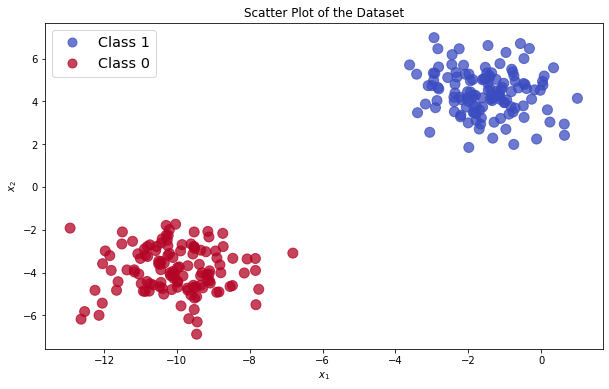

In [4]:
from sklearn import datasets
import matplotlib.pyplot as plt

#Generate an artifical linearly-separable dataset with 2 features and 250 samples
#using make_blobs function from scikit-learn.datasets
N = 250
p = 2
X, y = datasets.make_blobs(
    n_samples=N, n_features=p, centers=2, cluster_std=1.05, random_state=1
)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], marker='o', cmap='coolwarm', c=y, s=100, alpha=0.75);
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Scatter Plot of the Dataset")
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.show();

<font face="XB Zar" size=4><div dir=rtl>
برای ساختن مدل، ابتدا مدل خود را بر روی داده‌های آموزش برازش می‌کنیم و سپس صحت پیشبینی آن را بر روی داده‌های تست بررسی میکنیم؛ در اینجا از 80% داده‌ها برای آموزش و از سایر 20% جهت تست‌کردن مدل استفاده شده است: 
<br>    (از آنجا که دیتای تولید شده به صورت رندوم بوده است، نیازی به shuffle کردن پیش از تقسیم‌بندی نداریم.)
</div>

In [7]:
#Take 80% of data for training and the other 20% to test the accuracy of model
frac = 0.8
train_size = int(frac*N)
X_train = X[:train_size, :]
y_train = y[:train_size]

X_test = X[train_size:, :]
y_test = y[train_size:]

#Build the classifier
clf = maxMargin_classifier(learning_rate=1e-3, C=10, n_iters=1000)
#Fit the model on the train data
clf.fit(X_train, y_train)
#Predict the model on test data
y_pred_test = clf.predict(X_test)

#Find the accuracy of model on test set using the predicted labels with their true values
accuracy = np.sum(y_test==y_pred_test) / len(y_test)

print("Maximal Margin Classifier Accuracy:", accuracy*100, "%")

Maximal Margin Classifier Accuracy: 100.0 %


<font face="XB Zar" size=4><div dir=rtl>
در نهایت نیز می‌توانیم مرز بهینه را همراه با حاشیه بدست آمده ترسیم کنیم و نتایج خود را تایید نماییم: 
</div>

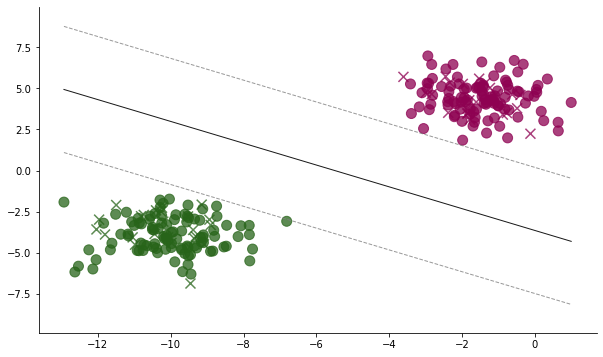

In [8]:
#a simple functin to get the hyperplane from the weights and bias of model
def get_hyperplane(x, w, b, offset):
    return (-w[0] * x - b + offset) / w[1]

fig, ax = plt.subplots(1, 1, figsize=(10,6))

plt.set_cmap('PiYG')
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, s=100, alpha=0.75)
plt.scatter(X_test[:, 0], X_test[:, 1], marker="x", c=y_test, s=100, alpha=0.75)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = get_hyperplane(x0_1, clf.w, clf.b, 0)
x1_2 = get_hyperplane(x0_2, clf.w, clf.b, 0)

x1_1_m = get_hyperplane(x0_1, clf.w, clf.b, -1)
x1_2_m = get_hyperplane(x0_2, clf.w, clf.b, -1)

x1_1_p = get_hyperplane(x0_1, clf.w, clf.b, 1)
x1_2_p = get_hyperplane(x0_2, clf.w, clf.b, 1)

ax.plot([x0_1, x0_2], [x1_1, x1_2], "-", c='k', lw=1, alpha=0.9)
ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "--", c='grey', lw=1, alpha=0.8)
ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "--", c='grey', lw=1, alpha=0.8)

x1_min = np.amin(X[:, 1])
x1_max = np.amax(X[:, 1])
ax.set_ylim([x1_min - 3, x1_max + 3])

for spine in ['top','right']:
    ax.spines[spine].set_visible(False)

plt.show()

<font face="XB Zar" size=4><div dir=rtl>
<center><font color="red" size="6">معرفی کتابخانه Scikit-Learn</font> <br> <br> 
<img src="resources/sk_learn.png" width="800">
</center>
</div> <br><br>
    
<font face="XB Zar" size=4><div dir=rtl>
<a href="https://scikit-learn.org/" style="text-decoration:none;">scikit-learn</a> از کتابخانه‌های متن‌باز پایتون است که ابزارهای کاربردی زیادی را به منظور یادگیری ماشین و مدل‌سازی آماری داده‌ها همچون طبقه‌بندی (classification) ، رگرسیون، خوشه‌بندی و کاهش ابعاد فراهم می‌کند. این کتابخانه بر پایه‌ی کتابخانه‌های <a href="https://numpy.org/" target="_blank" rel="noopener noreferrer"> Numpy </a>،<a href="https://pandas.pydata.org/" target="_blank" rel="noopener noreferrer"> Pandas</a> ،<a href="https://scipy.org/" target="_blank" rel="noopener noreferrer"> Scipy</a> و <a href="https://matplotlib.org/" target="_blank" rel="noopener noreferrer"> Matplotlib</a> طراحی شده است.</p>

<br>

<h2 style="text-align: justify;"><strong>ویژگی‌های Scikit-Learn</strong></h2>

<p style="text-align: justify;">علاوه بر کاربرد این کتابخانه در مواردی مانند بارگذاری، تغییر و دستکاری داده‌ها، Scikit-Learn در مدل‌سازی داده، تمرکز ویژه‌ای دارد. برخی از مدل‌سازی‌های مشهور در این کتابخانه عبارتند از:</p>
<ul style="text-align: justify;">
<font color='blue'><li>الگوریتم‌های یادگیری نظارت شده (Superuised Learning)</li>
</ul>
<p style="text-align: justify;">تقریبا تمامی الگویتم‌های یادگیری نظارت شده معروف رگرسیون خطی، ماشین بردار پشتیبان (SVM)، درخت تصمیم‌گیری و… در این کتابخانه موجود هستند.</p>
<ul style="text-align: justify;">
<font color='blue'><li>الگوریتم‌های یادگیری بدون نظارت (Unsuperuised Learning)</li>
</ul>
<p style="text-align: justify;">تمامی الگوریتم‌های نظارت نشده همچون روش‌های خوشه‌بندی، تحلیل فاکتوری، PCA، شبکه‌های عصبی نظارت نشده و… بخشی از کتابخانه‌ی Superuised Learning می‌باشند.</p>
<ul style="text-align: justify;">
<font color='blue'><li>اعتبارسنجی (Cross-Validation)</li>
</ul>
<p style="text-align: justify;">به منظور کنترل دقت مدل نظارتی بر روی داده‌های تست، مورد استفاده قرار می‌گیرد.</p>
<ul style="text-align: justify;">
<font color='blue'><li>کاهش ابعاد داده‌ها</li>
</ul>
<p style="text-align: justify;">به منظور کاهش ویژگی‌های داده‌ها جهت خلاصه‌سازی، مصورسازی و نیز انتخاب ویژگی مورد استفاده قرار می‌گیرد.</p>
<ul style="text-align: justify;">
<font color='blue'><li>روش‌های گروه‌بندی Ensemble Methods</li>
</ul>
<p style="text-align: justify;">همان‌طور که از نامش پیداست، این روش برای ترکیب مدل‌های یادگیری نظارت شده، به منظور پیش‌بینی برچسب داده‌های تست به کار می‌رود و در فصل آینده بیشتر با آن‌ها آشنا خواهید شد.</p>
<ul style="text-align: justify;">
<font color='blue'><li>استخراج ویژگی (Feature extraction)</li>
</ul>
<p style="text-align: justify;">به منظور تعریف ویژگی‌های جدید از روی ویژگی‌های اصلی جهت استخراج داده‌های مفید به کار می‌رود.</p>
<ul style="text-align: justify;">
<font color='blue'><li>انتخاب ویژگی (Feature selection)</li>
</ul>
<p style="text-align: justify;">روش‌هایی جهت انتخاب ویژگی برای ایجاد مدل‌هایی با دقت بالاتر یا افزونگی کمتر می‌باشند.</p>
</div>
                                                                    

<font face="XB Zar" size=4><div dir=rtl>
<h2 style="text-align: justify;">پیاده‌سازی Maximal Margin Classifier با استفاده از Scikit-learn<strong></strong></h2> 
<p style="text-align: justify;">Scikit-Learn مجموعه داده‌های نمونه‌ی محدودی همچون Iris و digit برای طبقه‌بندی (Classification) و قیمت خانه در Boston برای رگرسیون دارد که توسط ماژول 
    <code>sklearn.datasets</code> در دسترس هستند؛
     اما ما در این قسمت از یک دیتاست مصنوعی 2بعدی استفاده می‌کنیم تا بتوانیم نمایش مشخصی از مدل بدست آمده داشته باشیم.</p>
    <br> در ادامه سعی می‌کنیم پیاده‌سازی بالا را با استفاده از این کتابخانه انجام دهیم.
</div>


<div><font face="XB Zar" size=4><div dir=rtl>
<h4>انگیزه : بهترین مرز جدا کننده </h4><br>
ما به دنبال بهترین مرز جدا کننده هستیم اما این بهترین مرز چیست و چگونه پیدا میشود؟
</div>

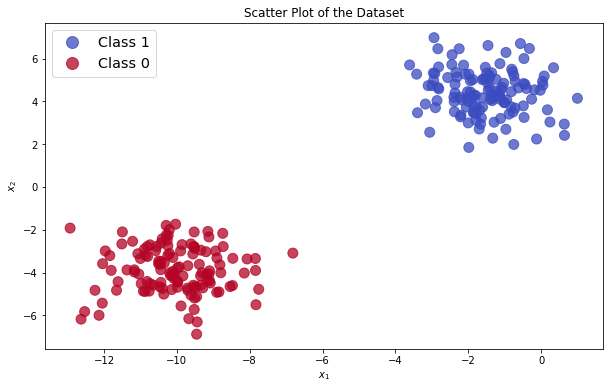

In [9]:
N = 250
p = 2
X, y = datasets.make_blobs(
    n_samples=N, n_features=p, centers=2, cluster_std=1.05, random_state=1
)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, cmap='coolwarm', alpha=0.75);
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Scatter Plot of the Dataset")
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=2)
plt.show();

ِ<div><font face="XB Zar" size=4><div dir=rtl>
اگر فاصله نزدیک‌ترین نقطه به مرز را حاشیه بنامیم، بهترین خط جداکننده دو کلاس، خطی است که این فاصله را بیشینه می‌کند. نمونه‌ای از خطوط جداکننده را همراه با حاشیه‌های آن‌ها در ادامه ترسیم می‌کنیم. 
<div>

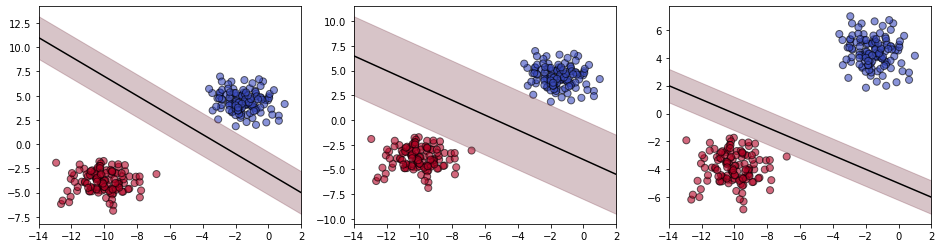

In [10]:
plt.figure(figsize=(16, 4))

# draw separators and margins
x_values = np.linspace(-14, 2)
for i, (w, b, m) in enumerate([(-1, -3, 2.2), (-0.75, -4, 4), (-0.5, -5, 1.2)]):
    plt.subplot(1, 3, i + 1)
    
    # draw data
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
    y_values = w * x_values + b
    
    # draw separator and margin
    plt.plot(x_values, y_values, '-k')
    plt.fill_between(x_values, y_values - m, y_values + m, edgecolor='none', color='#7D3C4A', alpha=0.3)
    plt.xlim(-14, 2)

plt.show()

<font face="XB Zar" size=4><div dir=rtl><div dir="rtl" class="blog-sc">

<h3 style="text-align: justify;"><strong>آموزش مدل</strong></h3>

<p style="text-align: justify;"> Scikit-Learn الگوریتم‌های یادگیری ماشین گسترده‌ای دارد که رابط یا اینترفیس ثابتی برای مدل کردن، پیش‌بینی دقت و فراخوانی برای تمام الگوریتم‌ها ارائه می‌دهد.</p>


<p style="text-align: justify;">مثال زیر نحوه‌ی آموزش SVC (Support Vector Classifier) را نمایش می‌دهد.</p>
</div>

In [11]:
from sklearn.svm import SVC

# create Support Vector Classifier using a linear kernel
clf = SVC(kernel='linear')

# train the classifier
clf.fit(X, y)

SVC(kernel='linear')

<font face="XB Zar" size=4><div dir="rtl" class="blog-sc">

<p style="text-align: justify;">همانند سایر طبقه‌بندها، SVC با دو آرایه مدل می‌شود:</p>


<ul style="text-align: justify;">
<li>ماتریس X که نگهدارنده‌ی نمونه‌های آموزشی است و در اندازه‌ی [n_samples, n_features] است.</li>
<li>آرایه‌ی y که مقادیر هدف یا target را نگهداری می‌کند. کلاس برچسب برای نمونه‌های آزمایشی است و در اندازه‌ی [n_samples] است.</li>
</ul>

<p style="text-align: justify;">بسیاری از الگوریتم‌های یادگیری ماشین دارای هایپرپارمترهایی هستند که باید پیش از آموزش مدل آن‌ها را مشخص کنیم؛ به طور مثال در این طبقه‌بند نیز باید هایپرپارامتر kernel را مشخص کنیم. درباره این هایپرپارامتر در ادامه کامل‌تر توضیح داده خواهد شد؛ 
    اما فعلا بدانید که با تنظیم آن بر روی <code>linear</code> درواقع همان Maxiaml Margin Classifier موردنظر ما را آموزش می‌دهد.</p>

<p style="text-align: justify;">در نهایت طبقه‌بند را بر روی ورودی X و خروجی Y با اعمال تابع fit برازش می‌کنیم.</p>

</div>

<font face="XB Zar" size=4><p dir=rtl style="text-align: justify;">حال می‌توانیم به کمک attribute (صفت) _coef از این کلاس، وزن اختصاصی هر ویژگی از داده‌های ورودی و به کمک صفت _intercept نیز بایاس ابرصفحه جداکننده را به دست آوریم :</p>

In [12]:
print("w =", clf.coef_)
print("b =", clf.intercept_)

w = [[-0.16340638 -0.24552258]]
b = [-0.87172498]


<font face="XB Zar" size=4><p dir=rtl style="text-align: justify;">
    مقادیر بالا نشان می‌دهند معادله ابرصفحه جداکننده به صورت
    $f(X) = w_1x_1+w_2x_2+b = -0.1634x_1 -0.2455x_2 -0.8717 = 0$
    می‌باشد. <br>
    همچنین می‌توانیم به کمک تابع <code>predict</code> کلاس داده‌های جدید را پیش‌بینی کنیم:
    </p>

In [13]:
new_samples = [[0, 5],
              [-4, -1]]
print(clf.predict(new_samples))

[0 1]


<div><font face="XB Zar" size=4><div dir=rtl>
در این مدل بردارهای پشتیبان در 
    <code>support_vectors_</code>
    ذخیره می‌شوند و می‌توانیم ببینیم کدام نمونه‌ها در مشخص‌کردن ابرصفحه بهینه نقش داشته‌اند:

In [14]:
clf.support_vectors_

array([[-3.05810916,  2.55776688],
       [-6.81531254, -3.08753469]])

<font face="XB Zar" size=4><div dir=rtl>
    همانطور که می‌بینیم، فقط 2 نمونه support داریم. <br> 
    در نهایت نیز به کمک تابع <code>plot_svc_decision_boundary</code> که در ادامه نوشته شده است، خط بهینه جداکننده‌ی دو کلاس که در این مدل بدست آمده است را ترسیم می‌کنیم.

In [15]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
        
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    
    # plot the margins
    ax.contour(X, Y, P, colors='k', 
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

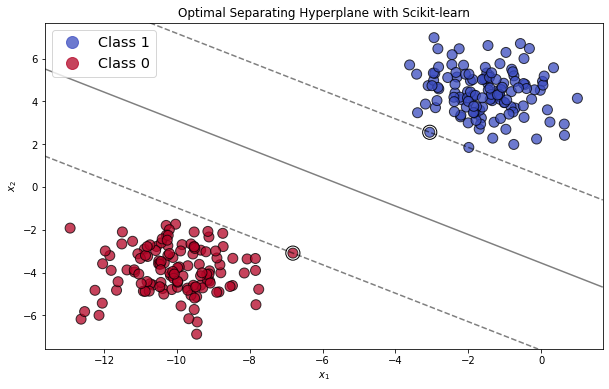

In [16]:
plt.figure(figsize=(10,6))
# plot data and margin
scatter_data = plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolors='black', cmap='coolwarm', alpha=0.75)
plt.legend(handles=scatter_data.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=2)
plot_svc_decision_function(clf)

# plot support vectors
scatter_support = plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                              s=200, edgecolors='k', facecolors='none')

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Optimal Separating Hyperplane with Scikit-learn");

<br>
<font face="XB Zar" size=4><div dir=rtl>
<center><font color="red" size="6">طبقه‌بند بردار پشتیبان (Support Vector Classifier)</font> </center> <br> <br>
    همانطور که می‌توانید حدس بزنید و در کلاس نیز اشاره شده است، طبقه‌بند بیشینه‌نمای حاشیه (Maximal Margin Classifier) فقط در شرایطی عملکرد صحیحی دارد که
    داده‌های دو کلاس به طور خطی تفکیک‌پذیر باشند. همچنین مرز این مدل توسط نمونه‌هایی مشخص می‌شود که بر روی حاشیه قرار میگیرند؛ در واقع در صورتی که فقط یکی از نمونه‌های آموزشی نزدیک به مرز مقداری تغییر اندازه داشته باشد، مرز تصمیم‌گیری به طور کامل تغییر میکند! 
    ذکر این نکته حائز اهمیت است که داده‌های ما در واقعیت در اکثر موارد مقداری Noise دارند و بنابراین مشکل بالا می‌تواند اثر نامطلوبی روی مرز تصمیم‌گیری ما داشته باشد. بنابراین این مدل به شدت قابلیت بیش‌برازش شدن (Overfitting) دارند.
<br>
<br> در ادامه، برای حالت گفته‌شده، مدل Maximal Margin Classifier را با استفاده از Scikit-learn امتحان میکنیم:
</div>

<font face="XB Zar" size=4><div dir=rtl>
<font color="red" size="5">محدودیت اول: وابستگی به نقاط مرزی  </font> <br> <br> 
خط بهینه در این حالت به نقاط مرزی وابستگی زیادی دارد؛ بنابرین تغییر کوچکی در هر یک از آن‌ها(همچون وجود نویز یا دلایل دیگر) معادله خط جدا کننده را تحت تاثیر شدید قرار می‌دهد؛ بنابراین، این مدل به شدت قابلیت بیش‌برازش دارد.
<br>در ادامه بر روی دیتاست اولیه که قابلیت جدایی‌پذیری خطی را دارد، مدل خود را برازش می‌کنیم؛ سپس یک نمونه‌ی نویزی به هر کلاس اضافه میکنیم و اثر آن‌ها را بر روی مرز تصمیم‌گیری مشاهده می‌کنیم:

In [19]:
N = 250
p = 2
X, y = datasets.make_blobs(
    n_samples=N, n_features=p, centers=2, cluster_std=1.05, random_state=1
)

X_noisy = np.concatenate((X,[[-5,1], [-6,-1]]), axis=0)
y_noisy = np.append(y,[0,1])

#Maximal Margin Classifier on initial dataset 
clf1 = SVC(kernel='linear', C=10)
clf1.fit(X, y);

#Maximal Margin Classifier on the dataset with an added noisy sample for class 0
clf2 = SVC(kernel='linear', C=10)
clf2.fit(X_noisy, y_noisy);

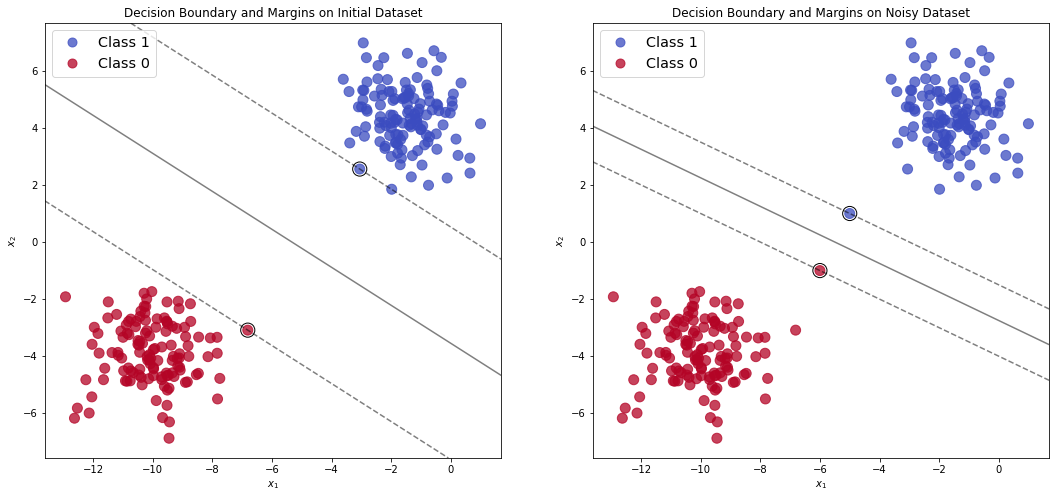

In [20]:
plt.figure(figsize=(18,8))

# plot data and margin on initial dataset
plt.subplot(1,2,1)
scatter1 = plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='coolwarm', alpha=0.75)
plt.legend(handles=scatter1.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plot_svc_decision_function(clf1)
# plot support vectors
plt.scatter(clf1.support_vectors_[:, 0], clf1.support_vectors_[:, 1], s=200,
            edgecolors='k', cmap='coolwarm', facecolors='none');
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Decision Boundary and Margins on Initial Dataset");


# plot data and margin on noisy dataset
plt.subplot(1,2,2)
scatter2 = plt.scatter(X_noisy[:, 0], X_noisy[:, 1], c=y_noisy, cmap='coolwarm', s=100, alpha=0.75)
plt.legend(handles=scatter2.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plot_svc_decision_function(clf2)
# plot support vectors
plt.scatter(clf2.support_vectors_[:, 0], clf2.support_vectors_[:, 1], s=200,
            edgecolors='k', cmap='coolwarm', facecolors='none')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Decision Boundary and Margins on Noisy Dataset");

<font face="XB Zar" size=4><div dir=rtl> 
همانطور که مشاهده می‌کنیم، در نمودار سمت چپ مرز تصمیم‌گیری رسم شده حاشیه‌ی آن مقدار قابل توجهی دارد؛ درحالیکه در نمودار سمت راست، به دلیل وجود دو نمونه نویزی، مرز تصمیم‌گیری و حاشیه‌های آن تغییراتی داشته‌اند و مقدار حاشیه آن کاهش زیادی داشته است. بنابراین اطمینان ما از مرز تصمیم‌گیری به دلیل کاهش حاشیه‌ی آن، کم خواهد شد.

<font face="XB Zar" size=4><div dir=rtl> 
<font color="blue" size=5>راه‌حل: استفاده از Soft Margin Classifier</font><br> <br>
    برای حل این مشکل می‎توان به‌جای پیدا کردن ابرصفحه‌ای که تمام داده‌های دو کلاس را به طور کامل از یکدیگر جدا نماید، ابرصفحه‌ای را استفاده نمود که **بیشتر** داده‌های دو کلاس را از یکدیگر تفکیک نماید؛ انگیزه ما از این کار می‌تواند بدین صورت باشد که طبقه‌بند ما حساسیت کمتری به هر نمونه داشته باشد و در نتیجه احتمال کمتری بابت بیش‌برازش شدن داشته باشد. درواقع مدل ما تعداد نسبتا کمی از نمونه‌های آموزشی را اشتباه طبقه‌بندی می‌کند به منظور اینکه بتواند عمومیت
    (generalization) بهتری بر داده‌های تست داشته باشد. 
<br> برای این منظور می‌توان به جای پیدا کردن ابرصفحه‌ای که به دنبال بیشترین حاشیه جهت تفکیک داده‌های دو کلاس است، اجازه دهیم برخی نمونه‌ها حاشیه تعریف شده را نقض کنند؛ البته این تخطی از مرز نیز باید به صورت کنترل‌شده‌ای باشد که باعث عملکرد ضعیف مدل ما نیز نباشد. این کار با اضافه‌شدن متغیرهای جدیدی به مسئله بهینه‌سازی انجام می‌شود که به این متغیرها **slack variables** می‌گویند و با $\xi$ نمایش می‌دهند.
این متغیر برای هر نمونه مقدار تخطی آن از حاشیه تعریف شده را مشخص می‌کند که در شکل زیر این موضوع به خوبی قابل مشاهده است.
</div>
    
<div> <br>
<center>
<img src="resources/SVM-with-soft-margin-kernel-with-different-cases-of-slack-variables.jpg" width="500">
</center>
</div>
    
    
<font face="XB Zar" size=4><div dir=rtl> 
در واقع در این حالت اجازه می‌دهیم بعضی نمونه‌های آموزشی در سمت اشتباه حاشیه و یا حتی در سمت اشتباه ابرصفحه جداکننده قرار گیرند که این موضوع زمانی که ابرصفحه جداکننده‌ای وجود نداشته باشد غیرقابل اجتناب می‌باشد؛ بنابراین به جای حالت قبل، مرزهای ما حالت نرم‌تری به خود می‌گیرند که به این طبقه‌بند **Soft Margin Classifier** می‌گویند.
    مسئله بهینه‎سازی ما در این حالت به صورت زیر خواهد بود:
\begin{equation*}
    \begin{aligned}
        \min_{w,b,\xi} \quad & \frac{1}{2}||w||_2 ^2+C\sum_{i=1}^{N}{\xi_{i}}\\
        \textrm{s.t.} \quad & y^{(i)}(w^T x^{(i)} + b) \geq 1-\xi_{i}\\
        &\xi_i\geq0 \quad \forall i \in \{1,2,...,N\}   \\
    \end{aligned}
    \end{equation*} </div>
    
<font face="XB Zar" size=4><div dir=rtl>
<br> در مسئله بهینه‌سازی بالا، $\xi_1, \xi_2 , ..., \xi_N$ همان slack variables می‌باشند و به هر نمونه اجازه می‌دهند که از حاشیه یا ابرصفحه جداکننده تخطی کند؛ هرچند مجموع این خطاها نیز به تابع هدف جهت کمینه‌شدن اضافه شده است و سعی می‌کنیم با این کار، از زیاد شدن این خطا جلوگیری کنیم. این متغیرهای نامنفی در واقع نشان می‌دهند که هر نمونه نسبت به حاشیه و ابرصفحه کجا قرار گرفته است. در صورتی‌که $\xi_i = 0$ باشد، نمونه متناظر در سمت درستی نسبت به حاشیه قرار گرفته است. در صورتی‌که $\xi_i > 0$ باشد اما، نمونه $i$م حاشیه را نقض کرده و در صورتی که $\xi_i > 1$ باشد نیز، نمونه متناظر در سمت اشتباهی نسبت به ابرصفحه جداکننده قرار می‌گیرد. <br>
<br> هایپرپارامتر C نوعی regularization parameter است که مشخص می‌کند در تابع هدف مسئله بهینه‌سازی، چقدر به اندازه حاشیه یا به دقت روی داده‌های آموزشی توجه کنیم. 
    به بیان دیگر، هرچه C بزرگتر باشد، اهمیت عدم اشتباه پیش‌بینی نکردن نمونه‌ها بیشتر می‌شود و در مسئله بهینه‌سازی سعی می‌شود مجموع slack variables کوچک شود؛ حتی اگر حاشیه ما کم شود. در صورتی‌که C کوچک باشد، اهمیت بیشتری به بیشینه کردن حاشیه داده خواهد شد و هزینه کمتری بابت قرارگرفتن نمونه‌ها در سمت اشتباه حاشیه یا ابرصفحه جداکننده به تابع هدف اضافه می‌شود. پس به نوعی، هایپرپارامتر C از طریق کنترل‌کردن عرض حاشیه، trade-off بین بایاس و واریانس مدل را در اختیار دارد و مقدار بهینه آن را باید با استفاده از cross-validation مشخص کنیم. در ادامه سعی می‌کنیم، اثر این هایپرپارامتر را بر روی دیتایی که تفکیک‌پذیر خطی نیست را مشاهده کنیم.

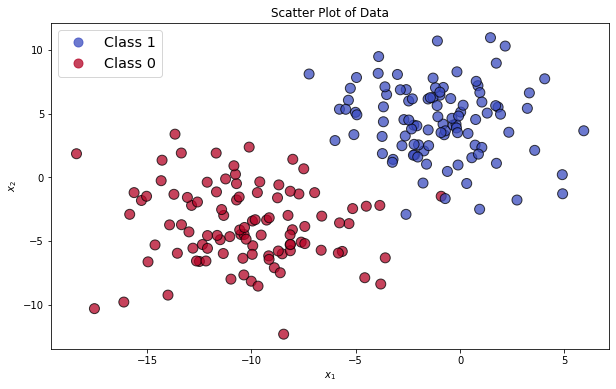

In [21]:
N = 200
p = 2
X, y = datasets.make_blobs(
    n_samples=N, n_features=p, centers=2, cluster_std=3, random_state=1
)

plt.figure(figsize=(10,6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='coolwarm', edgecolor='black', alpha=0.75)
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Scatter Plot of Data");
plt.show()

<font face="XB Zar" size=4><div dir=rtl>
همانطور که از توزیع داده‌ها مشخص هست، داده‌ها در این حالت کاملا تفکیک‌پذیر خطی نیستند؛ در ادامه سعی کنید با کامل‌کردن قطعه کد پایین، اثر هایپرپارامتر C را ترسیم کنید:

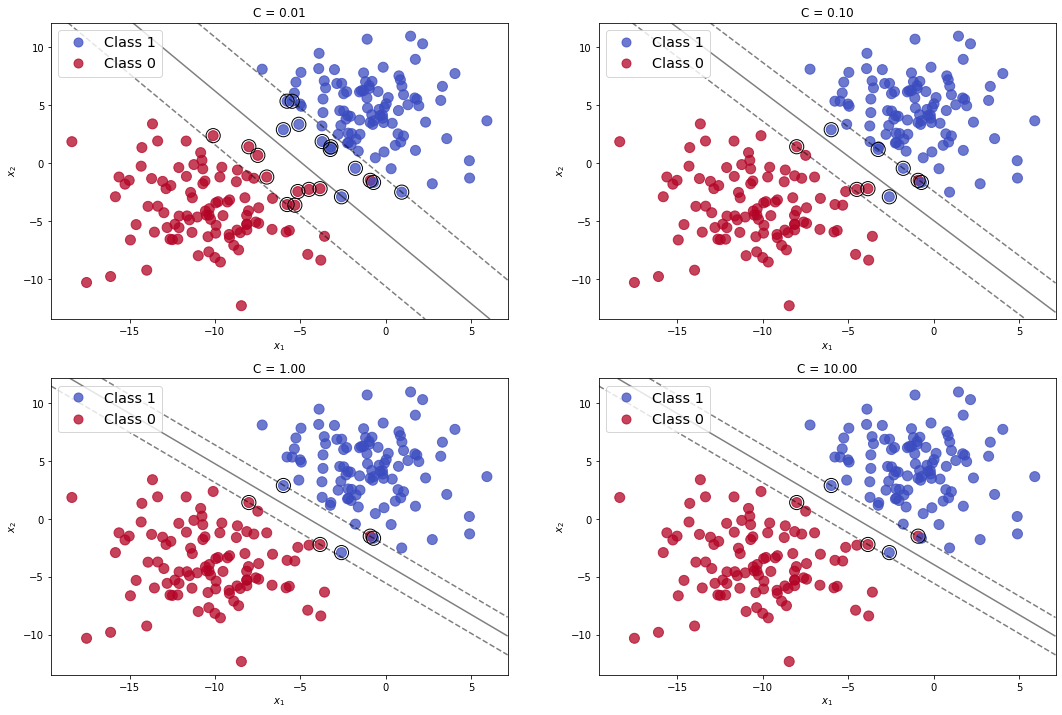

In [22]:
C_vals = [0.01, 0.1, 1, 10]

plt.figure(figsize=(18, 12))

for i in range(len(C_vals)):
    plt.subplot(2,2,i+1)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='coolwarm', alpha=0.75)
    plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
    #YOUR CODE (Fit the model and plot its support vectors and decision boundary)
    clf = SVC(kernel='linear', C=C_vals[i]).fit(X, y)
    plot_svc_decision_function(clf)
    # plot support vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none');
    
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.title("C = %.2f" % C_vals[i])
    del clf

<font face="XB Zar" size=4><div dir=rtl>
        همانطور که می‌بینید، با افزایش C حاشیه بدست آمده کوچک‌تر شده و همچنین تعداد نمونه‌های support نیز کمتر شده‌اند؛ یعنی نمونه‌های کمتری در مشخص‌کردن این مرز نقش داشته‌اند. پس می‌توانیم با بدست آوردن مقدار مناسبی برای این هایپرپارامتر، از soft margin classifier جهت طبقه‌بندی استفاده کنیم تا مدل نسبت به نمونه‌های آموزشی robustness بیشتری داشته باشد.
<br><br> با وجود تمام خاصیت‌های خوبی که soft margin classifier به مدل اولیه ما اضافه می‌کند، ما همچنان محدود به مرزهای خطی هستیم. پس باید به‌دنبال راهی برای رفع این محدودیت نیز باشیم: <br>

<font face="XB Zar" size=4><div dir=rtl>
<font color="red" size="5">محدودیت دوم: عدم تفکیک‌پذیری خطی داده‌ها</font> <br> <br>
    با وجود استفاده از Soft Margin Classifier نیز، مدل ما همچنان محدود به تشخیص مرز‌های خطی می‌باشد؛ درحالیکه مدل‌های خطی محدودیت‌های زیادی دارند و پاسخگوی بسیاری از مسائل دنیای واقعی نمی‌باشند. 
    در ادامه بر روی دیتای نمودار زیر مدل خود را بررسی میکنیم؛ همانطور که از توزیع نمونه‌ها مشخص است، توسط یک مرز خطی تفکیک نمی‌شوند:
</div>

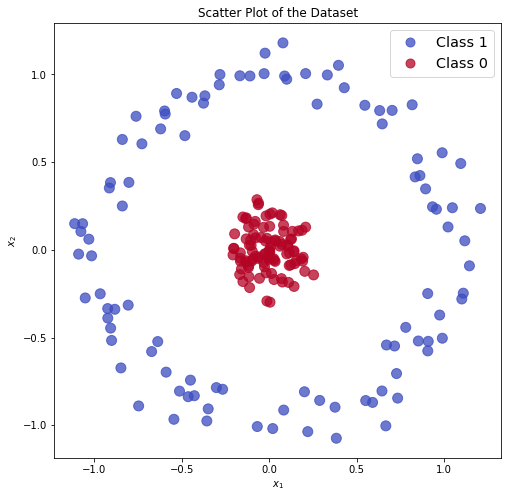

In [23]:
# create dataset
X, y = datasets.make_circles(200, factor=0.1, noise=0.1, random_state=1)

plt.figure(figsize=(8,8))
scatter = plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, cmap='coolwarm', alpha=0.75)
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Scatter Plot of the Dataset")
plt.show()

<font face="XB Zar" size=4><div dir=rtl>
می‌توانیم همانند بخش قبل مدل خود را بر داده‌های آموزش fit کرده و دقت آن را بر روی داده‌های تست بسنجیم. برای تقسیم داده‌ها به نمونه‌های آموزش و تست، می‌توانیم از تابع <code>train_test_split</code> که در ماژول <code>sklearn.model_selection</code> موجود می‌باشد استفاده کنیم.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#Build the classifier
clf = SVC(kernel='linear', C=10)
#Fit the model on the train data
clf.fit(X_train, y_train)
#Predict the model on test data
y_pred_test = clf.predict(X_test)

#Find the accuracy of model on test set by comparing the predicted labels with their true values
accuracy = np.sum(y_test==y_pred_test) / len(y_test)

print("Maximal Margin Classifier Accuracy:", accuracy*100, "%")

Maximal Margin Classifier Accuracy: 52.5 %


<font face="XB Zar" size=4><div dir=rtl>
همانطور که مشاهده میکنید، دقت مدل 52.5% می‌باشد که از مطلوب ما بسیار فاصله دارد. می‌توانیم مرزهای تصمیم‌گیری را نیز مانند بخش قبل ترسیم کنیم: 

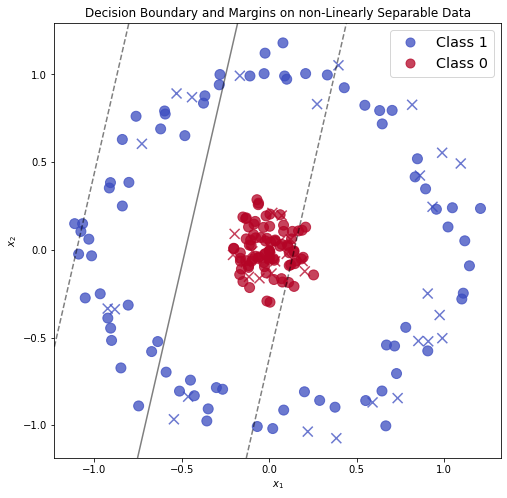

In [25]:
plt.figure(figsize=(8, 8))
train_plt = plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, cmap='coolwarm', s=100, alpha=0.75)
test_plt = plt.scatter(X_test[:, 0], X_test[:, 1], marker="x", c=y_test, cmap='coolwarm', s=100, alpha=0.75)
plot_svc_decision_function(clf)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Decision Boundary and Margins on non-Linearly Separable Data")
plt.legend(handles=train_plt.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.show()

<font face="XB Zar" size=4><div dir=rtl> 
<font color="blue" size=5>راه‌حل: استفاده از Kernel </font><br> <br>
همانطور که گفتیم، گاهی ممکن است داده‌های دو کلاس به طور خطی تفکیک پذیر نباشند و میبایست از یک منحنی به عنوان مرز جداساز استفاده کنیم. درواقع باید بتوانیم مرزهای غیرخطی را نیز بدست آوریم تا الگوریتم ما قابلیت استفاده بیشتری داشته باشد. یکی از راه‌های ممکن برای رسیدن به این هدف، گسترش فضای ویژگی ما به ابعاد بالاتر از طریق تبدیل ویژگی‌ها می‌باشد. یعنی با استفاده از ویژگی‌هایی همچون $X_1^2, X_2^2, X_1X_2 , ...$ بتوانیم در فضای ویژگی‌های جدید، مدل خطی خود را برازش کنیم؛ این موضوع منجر به یک مرز غیرخطی در فضای ویژگی‌های اولیه می‌شود.<br>
    دیتاست بالا را درنظر بگیرید؛ همانطور که از توزیع داده‎ها مشخص است، یک مرز دایروی می‌تواند داده‌های دو کلاس را از یکدیگر تفکیک کند؛ اما الگوریتم ما محدود به تشخیص مرزهای خطی می‌باشد. حال یک ویژگی جدید به صورت $X_3 = X_1^2+X_2^2$ برای داده‌ها تعریف می‌کنیم.

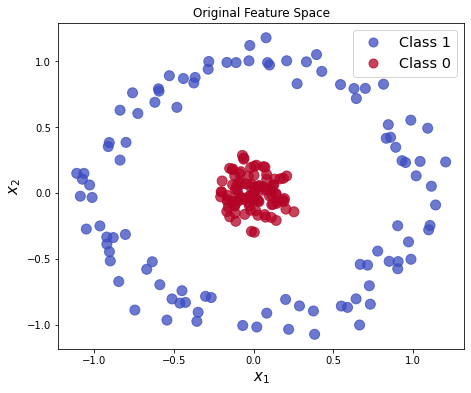

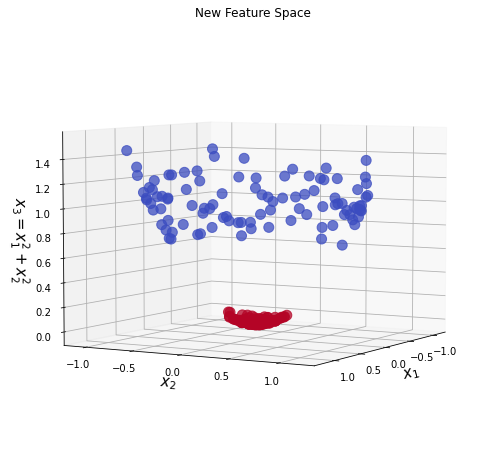

In [26]:
X2d, y = datasets.make_circles(200, factor=0.1, noise=0.1, random_state=1)

#Add a new feature as: x_3 = x_1^2+x_2^2
X_3 = X2d[:,0]**2 + X2d[:, 1]**2
X3d = np.concatenate((X2d, X_3.reshape(-1,1)), axis=1)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
scatter2d = plt.scatter(X2d[:, 0], X2d[:, 1], marker='o', c=y, s=100, cmap='coolwarm', alpha=0.75)
plt.legend(handles=scatter2d.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.xlabel("$x_1$", fontsize=15)
plt.ylabel("$x_2$", fontsize=15)
plt.title("Original Feature Space")


fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X3d[:, 0], X3d[:, 1], X3d[:, 2], marker='o', c=y, s=100, cmap='coolwarm', alpha=0.75)
ax.view_init(elev=5, azim=30)
ax.set_xlabel('$x_1$', fontsize=15)
ax.set_ylabel('$x_2$', fontsize=15)
ax.set_zlabel('$x_3=x_1^2+x_2^2$', fontsize=15)
#plt.legend(labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
ax.set_title('New Feature Space')
#ax.legend(['Class 1','Class 0'])
plt.show()

<font face="XB Zar" size=4><div dir=rtl> 
    همانطور که مشاهده می‌کنید، در فضای جدید داده‌های دو کلاس توسط یک صفحه جداپذیر هستند و بهترین صفحه را می‌توانیم با با استفاده از Maximal Margin Classifier یا Soft Margin Classifier بدست آوریم؛ برای مثال یکی از صفحه‌های جداکننده طبق شکل بالا،
    $$X_3 = 0.4 \Rightarrow X_1^2+X_2^2 = 0.4$$
    می‌باشد که نشان‌دهنده‌ی مرز دایروی در فضای ویژگی اولیه است؛ پس بدین ترتیب توانستیم به یک منحنی جداکننده در فضای اولیه برسیم.
    <br><br> اما همانطور که می‌دانید، پیداکردن این ویژگی‌های جدید که  منجر به یافتن مرز خطی در فضای جدید شوند همیشه قابل انجام نیست؛ زیرا در بسیاری از موارد ابعاد داده‌های ما قابل نمایش نیستند و همچنین یافتن این تبدیل ویژگی‌های مناسب، شاید مانند مثال بالا ساده نباشد. همچنین در صورتی که بخواهیم از ویژگی‌هایی که حاصل بسط چندجمله‌ای هستند استفاده کنیم، افزودن درجات بالاتر باعث می‌شود تعداد ویژگی‌های ما به طرز قابل توجهی افزایش یابد و پیچیدگی مدل را بالا برده و در نتیجه سرعت الگوریتم کاهش می‌یابد. بنابراین باید بتوانیم از یک روش هوشمندانه‌تر و قابل تعمیم برای این مقصد استفاده کنیم. <br><br> 
    بار دیگر مسئله بهینه‌سازی Soft Margin Classifier را بنویسیم:
\begin{equation*}
    \begin{aligned}
        \min_{w,b,\xi} \quad & \frac{1}{2}||w||_2 ^2+C\sum_{i=1}^{N}{\xi_{i}}\\
        \textrm{s.t.} \quad & y^{(i)}(w^T x^{(i)} + b) \geq 1-\xi_{i}\\
        &\xi_i\geq0 \quad \forall i \in \{1,2,...,N\}   \\
    \end{aligned}
\end{equation*}
<br> برای هر مسئله بهینه‌سازی محدب می‌توان یک مسئله معادل تعریف کرد که به آن مسئله دوگان یا Dual گفته می‌شود.
    (جزئیات مسئله دوگان فراتر از مباحث این درس می‌باشد و در دروس تخصصی مرتبط به بهینه‌سازی، آن را کامل‌تر می‎توانید مطالعه کنید.)
     می‌توان نشان داد مسئله دوگان Soft Margin Classifier نیز با استفاده از لاگرانژین(Lagrangian) آن به صورت زیر می‌باشد:
\begin{equation*}
    \begin{aligned}
        \max_{\alpha} \quad & \sum_{i=1}^{N}{\alpha_i} - \frac{1}{2} \sum_{i=1}^{N}{\sum_{j=1}^{N} {\alpha_i \alpha_j y^{(i)} y^{(j)} {x^{{(i)}^T} x^{(j)}}}} \\
        \textrm{s.t.} \quad & \sum_{i=1}^{N} \alpha_i y^{(i)} = 0\\
        &0 \leq \alpha_i \leq C \quad \forall i \in \{1,2,...,N\}
        \\
    \end{aligned}
\end{equation*}
<br>  مسئله بالا همچنان یک مسئله بهینه‌سازی محدب می‌باشد و در صورتی که بتوانیم تمام $\alpha_i$ ها را بدست آوریم، وزن‌های بهینه به صورت زیر بدست خواهند آمد:
 $$w = \sum_{i=1}^{N}{\alpha_i y^{(i)}x^{(i)}}$$
 یک نکته خیلی جالب این است که پس از بدست آوردن ضرایب $\alpha_i$، می‌بینیم که بسیاری از آن‌ها صفر هستند و فقط تعدادی از آن‌ها غیرصفر می‌باشند که به نمونه متناظر آن‌ها نیز نمونه Support گفته می‌شود. حالا شاید برای شما واضح‌تر باشد چرا بالاتر نیز اشاره شده بود که فقط تعداد کمی از داده‎ها نمونه‌ی Support هستند و در تعیین مرز تصمیم‌گیری نقش مستقیمی دارند! بایاس این معادله را نیز می‌توان نشان داد که(با استفاده از شرایط KKT) از طریق یکی از نمونه‌های Support بدست می‌آید. در نهایت با پیداکردن بردار وزن‌ها و بایاس، تابع طبقه‌بند Support Vector Classifier ما به صورت زیر خواهد شد: <br> <br>
   $$f(x) = w^T x + b \Rightarrow$$
\begin{equation*}
        f(x) = b + \sum_{i \in \mathcal{S}} \alpha_i y^{(i)}{x^T x^{(i)}} = b + \sum_{i \in \mathcal{S}} \alpha_i y^{(i)}{\langle x, x^{(i)} \rangle}
\end{equation*}
که $\mathcal{S}$ مجموعه Support می‌باشد. از معادله بالا اینگونه برمی‌آید که برای بدست آوردن تابع طبقه‌بند، فقط نیازمند ضرب داخلی بین نمونه‌ها $\langle x^{(i)}, x^{(j)} \rangle$ هستیم! 
    <br> <br>
    نگاشت ویژگی 
    $T: x \rightarrow \phi (x) $ را درنظر بگیرید. می‌توان به جای تمام جاهایی که الگوریتم ما به ضرب داخلی 
    $\langle x^{(i)}, x^{(j)} \rangle$
    نیاز دارد، ضرب داخلی نگاشت آن‌ها، یعنی
    $\langle \phi(x^{(i)}), \phi(x^{(j)}) \rangle$
    را جایگزین نمود و الگوریتم ما دقیقا مانند قبل عمل کند؛ به طوری‌که صرفا ویژگی‌های اولیه تبدیل به ویژگی‌های جدیدی از طریق نگاشت T شده‌اند.
    به طور مشخص، ما کرنل (Kernel) متناظر این تبدیل را به صورت زیر تعریف می‌کنیم: <br> <br>
    \begin{equation*}
        K(x, x') = \langle \phi(x),\phi(x') \rangle = \phi(x)^T \phi(x') 
    \end{equation*}
    در نتیجه در این حالت، مدل ما با استفاده از ویژگی‌های جدید $\phi$ آموزش می‌بیند!
    </div>
    
<font face="XB Zar" size=4><div dir=rtl> <br><br>
     حال سوالی که پیش می‌آید این است که کرنل مناسب را چگونه پیدا کنیم؟ <br>
    ماتریس کرنل K را به صورت زیر تعریف می‌کنیم:
    $$K_{i,j} = K(x^{(i)}, x^{(j)})$$
    یعنی در هر درایه آن، حاصل تابع کرنل بین دو نمونه قرار داده شده است. می‌توان نشان داد تابعی برای کرنل معتبر است که منجر به ماتریس کرنل متقارن و نیمه‌مثبت معین شود و این قضیه شرط لازم و کافی است.(قضیه Mercer) <br>
    در نهایت نیز با حل مسئله بهینه‌سازی جدید که ضرب‌داخلی‌ها با کرنل جایگزین شده‌اند، تابع طبقه‌بند ما به صورت زیر خواهد شد:
\begin{equation*}
    f(x) = b + \sum_{i \in \mathcal{S}} \alpha_i y^{(i)}{K(x,x^{(i)})}
\end{equation*}
<br><br> حال احتمالا باید برایتان مشخص شده باشد که چرا در تابع SVC هایپرپارامتر آن را بر روی <code>linear</code> تنظیم می‌کردیم. در این حالت مدل به سادگی از ضرب داخلی در فضای اولیه ویژگی‌ها استفاده می‌کند و نگاشت خاصی صورت نمی‌گیرد(درواقع نگاشت همانی صورت گرفته است و تغییری در ویژگی‌ها انجام نشده است!).
    پس مدل ما محدود به پیداکردن یک طبقه‌بند خطی خواهد شد و درنتیجه همان Soft Margin Classifier می‌باشد. <br> <br>
    در ادامه به معرفی دو کرنل معروف و پرکاربرد میپردازیم که در کتابخانه Scikit-learn نیز قابل استفاده هستند:

<font face="XB Zar" size=4><div dir=rtl> 
<h4>کرنل چندجمله‌ای (Polynomial Kernel) </h4> <br>
    همانطور که در مثال اول این بخش دیدید، اضافه کردن ویژگی مرتبه دوم باعث شد در فضای جدید داده‌های ما جدایی‌پذیر خطی باشند. یک ایده خوب می‌تواند اضافه کردن درجات بالاتر به فضای ویژگی‌های ما باشد که منجر به یک منحنی طبقه‌بند از مرتبه بالا در فضای اولیه شود. با استفاده از کرنل چندجمله‌ای می‌توانیم این کار را بدون آن‌که نیاز باشد خودمان آن‌ها را اضافه کنیم، به فضای ویژگی‌ها اضافه کنیم؛ پس در این حالت افزایش تعداد ویژگی‌ها نیز مشکلی ایجاد نخواهد کرد. درباره پیچیدگی محاسبه و برتری استفاده از کرنل‌ها نسبت به اضافه کردن دستی ویژگی‌های ابعاد بالا در ادامه توضیحاتی خواهیم داشت. <br> <br>
    کرنل چندجمله‌ای از مرتبه d به صورت زیر تعریف می‌شود:
    $$K(x,y) = (1+\langle x,y \rangle)^d$$
    <br> برای مثال، کرنل چندجمله‌ای از مرتبه دوم را برای داده‌های دوبعدی درنظر بگیرید:
    $$K(x,y) = (1+\langle x,y \rangle)^2 = (1+x_1y_1+x_2y_2)^2 \Rightarrow$$
    $$K(x,y) = 1 + 2x_1y_1 + 2x_2y_2 + 2x_1x_2y_1y_2 + x_1^2y_1^2 + x_2^2y_2^2$$ <br>
    از طرفی از آنجا که $K(x,y) = \langle \phi(x),\phi(y) \rangle$ می‌باشد، پس نگاشت انجام‌شده به صورت
    $$ \phi(x) = (1, \sqrt{2}x_1, \sqrt{2}x_2, \sqrt{2}x_1x_2, x_1^2, x_2^2)$$
    است. پس بدون آن‌که مستقیما فضای ویژگی جدید را ایجاد کنیم، با استفاده از این کرنل توانسته‌ایم ویژگی‌های دلخواه خود را به مسئله بیافزاییم. آیا از همین مثال ساده برتری 
    محاسباتی استفاده از کرنل برای شما مشخص است؟ <br><br>
     در ادامه بر روی دیتاست زیر، یک‌بار از کرنل مرتبه 3 و بار دیگر از کرنل مرتبه 9 برای آموزش مدل استفاده می‌کنیم و ناحیه تصمیم‌گیری آن‌ها را ترسیم می‌کنیم.
    برای این‌کار کافیست هایپرپارامتر <code>kernel</code> را به روی <code>poly</code> تنظیم نماییم و درجه آن را مشخص نماییم. همچنین همانند مسئله Soft Margin Classifier باید پارامتر C را نیز مشخص کنیم.
    <br><br> (برای سادگی و نمایش بهتر ناحیه‌های جداشده کلاس‌ها از تابع <code>plot_decision_region</code> از کتابخانه <code>mlxtend</code> استفاده می‌کنیم؛ پس اگر آن را نصب ندارید با استفاده از <code>pip install mlxtend</code> آن را نصب نمایید.)

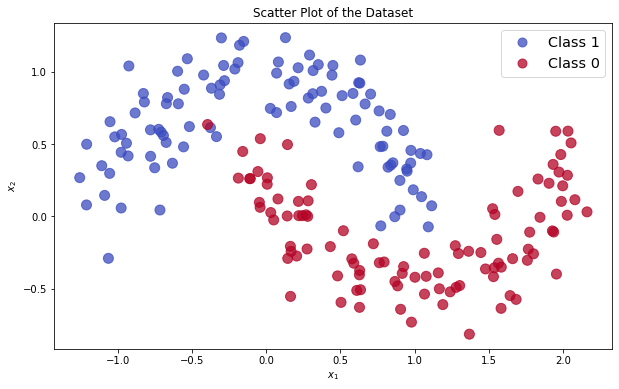

In [27]:
X, y = datasets.make_moons(n_samples=200,noise=0.15, random_state=0)

plt.figure(figsize=(10,6))
scatter = plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, cmap='coolwarm', alpha=0.75)
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Scatter Plot of the Dataset")
plt.show()

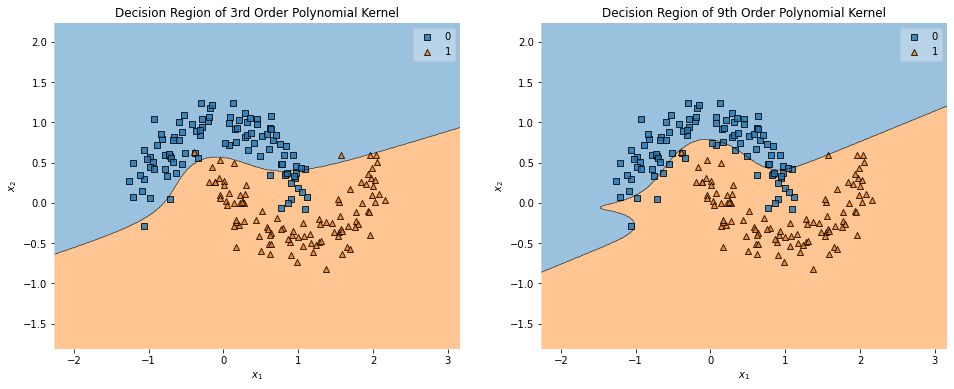

In [28]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(16, 6))

#a 3rd order poly kernel svc
clf = SVC(kernel='poly', degree=3, C=10)
clf.fit(X, y)
plt.subplot(1,2,1)
plot_decision_regions(X, y, clf=clf, legend=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Decision Region of 3rd Order Polynomial Kernel")

#a 9th order poly kernel svc
clf = SVC(kernel='poly', degree=9, C=10)
clf.fit(X, y)
plt.subplot(1,2,2)
plot_decision_regions(X, y, clf=clf, legend=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Decision Region of 9th Order Polynomial Kernel");

<font face="XB Zar" size=4><div dir=rtl> 
    همانطور که مشاهده می‌کنید، افزودن درجه‌های بالاتر از ویژگی‌ها لزوما منجر به بهبود مرز تصمیم‌گیری نیست و باید بهترین درجه را با استفاده از cross validation پیدا نمود. درواقع اگر مدل ما overfit شده باشد، باید از مرتبه‎های پایین‎تری به عنوان درجه این کرنل استفاده نمود و در صورتی‌که مدل underfit شده باشد، باید پیچدگی آن را با استفاده از افزایش این درجه زیاد نمود.  

<font face="XB Zar" size=4><div dir=rtl> 
<h4>کرنل RBF (Radial Basis Function)</h4> <br>
    دید دیگری که می‌توان به کرنل داشت، این است که کرنل به‌عنوان معیاری از شباهت مورد استفاده قرار گیرد. یعنی از تابعی به عنوان کرنل استفاده کنیم که مشخص‌کننده میزان شباهت و نزدیکی نمونه‌ها به یکدیگر باشد؛ پس هرچه دو نمونه به یکدیگر نزدیک‌تر باشند، این تابع مقدار بزرگتری اخذ کند و اگر دو نمونه از هم دور باشند، مقدار این تابع کوچک‌تر باشد. <br> 
    یک تابع مناسب برای این مقصد، تابع RBF گوسی (Gaussian Radial Basis Function) می‌باشد که به صورت زیر تعریف می‌شود: <br> <br>
    \begin{equation*}
			K(x,y) = \exp(-\gamma \lVert x-y \rVert ^2)
	\end{equation*}
    در شکل زیر این تابع را برای داده‌های دوبعدی ترسیم می‌کنیم:

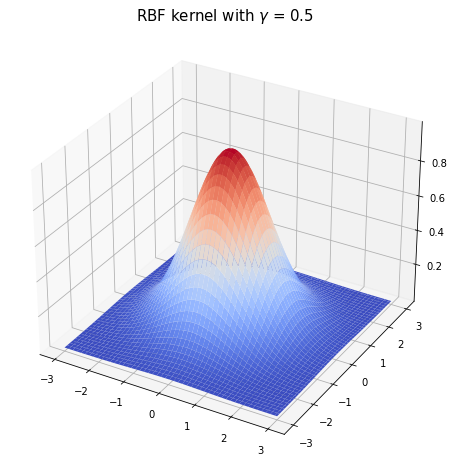

In [29]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)

gamma = 0.5
R = np.exp(-gamma*(X1 ** 2 + X2 ** 2))
surf = ax.plot_surface(X1, X2, R, cmap=plt.cm.coolwarm)
plt.title('RBF kernel with $\gamma$ = {:.1f}'.format(gamma), fontsize=15)
plt.show()

<font face="XB Zar" size=4><div dir=rtl> 
    هایپرپارامتر $\gamma$ تعیین‌کننده میزان واریانس این تابع است؛ یعنی هرچه این پارامتر کمتر باشد، واریانس بیشتر است و به نمونه‌های دورتر وزن نسبتا بیشتری داده خواهد شد و برعکس:

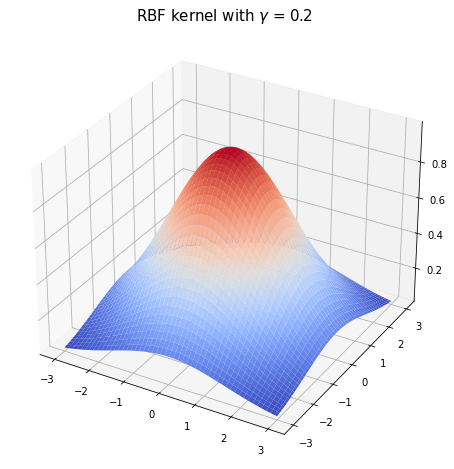

In [30]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)

gamma = 0.2
R = np.exp(-gamma*(X1 ** 2 + X2 ** 2))
surf = ax.plot_surface(X1, X2, R, cmap=plt.cm.coolwarm)
plt.title('RBF kernel with $\gamma$ = {:.1f}'.format(gamma), fontsize=15)
plt.show()

<font face="XB Zar" size=4><div dir=rtl> 
    حال دیتاست <code>make_circles</code> را بار دیگر درنظر بگیرید؛ در صورتی‌که از این تابع به‌عنوان کرنل انتخاب کنیم
    (با تنظیم <code>"kernel="rbf</code>)، مرز‌های تصمیم‌گیری خود را می‌توانیم مشاهده کنیم:

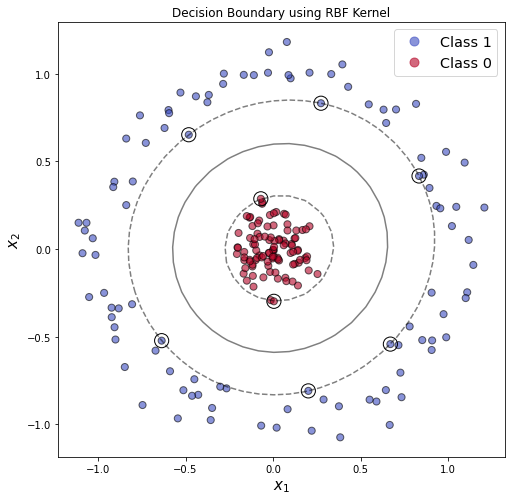

In [31]:
X, y = datasets.make_circles(n_samples=200, factor=0.1, noise=0.1, random_state=1)
clf = SVC(kernel='rbf', gamma=0.7, C=10)
clf.fit(X, y)

plt.figure(figsize=(8,8))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none')
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 1','Class 0'], fontsize='x-large', markerscale=1.5)
plt.xlabel("$x_1$", fontsize=15)
plt.ylabel("$x_2$", fontsize=15)
plt.title("Decision Boundary using RBF Kernel")
plt.show()

<font face="XB Zar" size=4><div dir=rtl> 
    برای دیتاست <code>make_moons</code> نیز خواهیم داشت:

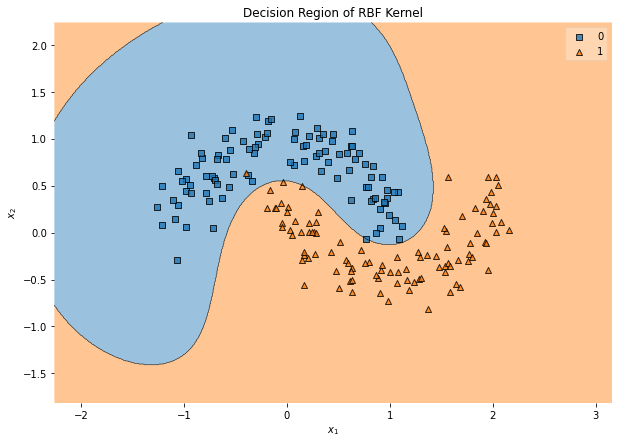

In [32]:
X, y = datasets.make_moons(n_samples=200,noise=0.15, random_state=0)
clf = SVC(kernel='rbf', gamma=0.8, C=5)
clf.fit(X, y)

plt.figure(figsize=(10,7))
plot_decision_regions(X, y, clf=clf, legend=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Decision Region of RBF Kernel")
plt.show()

<font face="XB Zar" size=4><div dir=rtl> 
    همانطورکه می‌بینید، با استفاده از کرنل RBF مرز تقسیم‌بندی داده‌های دو کلاس بسیار بهتر بدست آمده است و این کرنل معمولا عملکرد بهتری دارد و به صورت پیش‌فرض نیز کرنل مدل SVC بر روی این کرنل تنظیم شده است.
    <br> <br> علاوه بر کرنل‌های ذکرشده، کرنل‌های دیگری نیز همچون <code>String kernel</code> وجود دارند، هرچند پرکاربرد و محبوب نیستند و فقط در مواردی خاص مورد استفاده قرار می‌گیرند.

<font face="XB Zar" size=4><div dir=rtl> 
<h4>پیچدگی محاسبه در SVM</h4> <br>
    در ابتدا سعی می‌کنیم با یک مثال ساده نشان دهیم که استفاده از کرنل چه تاثیری بر پیچیدگی محاسبه دارد و برتری استفاده از کرنل به جای گسترش فضای ویژگی‌ها(Feature Expansion) به صورت دستی را مشاهده نماییم.
    در واقع نشان می‌دهیم که اگر بتوانیم ماتریس کرنل را به صورت بهینه محاسبه نماییم، خواهیم توانست مدل‌های SVM خود را در فضای ویژگی با ابعاد بالاتر که با $\phi$ گسترش داده شده است آموزش دهیم، بدون آن‌که نیاز باشد صراحتا بردارهای $\phi (x)$ را پیدا کنیم! <br>
    مثال زیر را درنظر بگیرید. بردارهای $x, y \in R^p$ هستند و فرض کنید تابع کرنل به صورت زیر تعریف شود:
    $$K(x,y) = (x^Ty)^2$$
    می‌توانیم تابع کرنل بالا را به صورت زیر بنویسیم:
    $$K(x,y) = \bigg(\sum_{i=1}^{p}x_i y_i \bigg) \bigg(\sum_{j=1}^{p}x_i y_i \bigg) $$
    $$ = \sum_{i=1}^{p} \sum_{j=1}^{p} x_i x_j y_i y_j $$
    $$ = \sum_{i,j=1}^{p} (x_i x_j) (y_i y_j) $$
    از طرفی،
    $K(x,y) = \phi(x)^T \phi(y)$ می‌باشد؛ پس می‌توان تشخیص داد که نگاشت ویژگی‌های $\phi$ به صورت زیر است: (برای سادگی p=3 قرار داده شده است.)
    \begin{align}
    \phi(x) &= \begin{bmatrix}
           x_1 x_1 \\
           x_1 x_2 \\
           x_1 x_3 \\
           x_2 x_1 \\
           x_2 x_2 \\
           x_2 x_3 \\
           x_3 x_1 \\
           x_3 x_2 \\
           x_3 x_3 \\
         \end{bmatrix}
  \end{align}
    همانطور که می‌بینید، با وجود اینکه محاسبه $\phi(x)$ با بعد بالا نیازمند $O(p^2)$ زمان است،
    محاسبه $K(x,y)$ فقط نیازمند به $O(p)$ زمان دارد که نشان می‌دهد نسبت به بعد اولیه ویژگی‌ها خطی است!
    بنابراین با استفاده از این کرنل توانستیم فضای ویژگی گفته شده را با پیچیدگی محاسباتی به مراتب کمتری بسازیم. <br> <br>
    در حالت کلی‌تر، می‌توان نشان داد کرنل $K(x,y) = (x^Ty + c)^d$ معادل با نگاشت ویژگی‌ها (Feature Mapping) به فضای ویژگی‌هایی از بعد 
    $ p+d \choose d$ خواهد شد که شامل تمام تک‌جمله‌ای‌(monomial)هایی به شکل 
    $x_{i_1}x_{i_2}...x_{i_k}$ تا مرتبه d می‌باشند.
    با این حال، با وجود اینکه داریم در فضایی $O(p^d)$بعدی مدل خود را آموزش می‌دهیم، محاسبه‌ی $K(x,y)$ همچنان تنها نیازمند به $O(p)$ زمان دارد و در نتیجه ما هیچگاه نیاز به تعریف این فضای ویژگی به طور صریح نخواهیم داشت؛ درحالیکه مدل ما به طور ضمنی در حال یادگیری در این فضا می‌باشد!
    <br><br><br>
    از لحاظ عملیاتی و پیاده‌سازی با استفاده از کتابخانه <code>scikit-learn</code> نیز ذکر چند نکته خالی از لطف نیست. کلاس <code>linearSVC</code> یک کلاس برای پیاده‌سازی SVM خطی می‌باشد و کرنل‌ها را پشتیبانی نمی‌کند؛ اما از لحاظ پیچیدگی محاسباتی نسبت به تعداد داده‌ها و تعداد ویژگی‌ها خطی است و پیچیدگی آن از مرتبه $O(N\times p)$ می‌باشد. کلاس <code>SVC</code> که بالاتر نیز از آن استفاده نمودیم از کرنل‌ها پشتیبانی می‌کند ولی پیچیدگی محاسباتی آن معمولا بین 
    $O(N^2 \times p)$ و $O(N^3 \times p)$ است که نشان می‌دهد این الگوریتم نسبت به تعداد نمونه‌ها به شدت اثرپذیر است و با افزایش آن‌ها این الگوریتم کند می‌شود. استفاده از این کلاس هنگام داشتن دیتاست‌های پیچیده کوچک یا متوسط مناسب‌تر به نظر می‌رسد. با این وجود، این الگوریتم نسبت به تعداد ویژگی‌ها نیز خطی است.  

<br>
<font face="XB Zar" size=4><div dir=rtl>
<center><font color="red" size="6">طبقه‌بند بردار پشتیبان چندکلاسه (Multi-Class SVC)</font> </center> <br> <br>
    در تمام مثال‌های بالا هدف ما طبقه‌بندی داده‌های دو کلاس بود و در واقع یک binary classifier داشتیم؛ اما در بسیاری از مسائل تعداد کلاس‌ها بیشتر از دو می‌باشد و باید بتوانیم الگوریتم خود را برای این حالت‌ها نیز استفاده کنیم. برای رسیدن به این مقصود دو روش کلی وجود دارد:
    <h3>One-vs-Rest (One-vs-All)</h3> <br>
    در این روش، ما نیازمند ابرصفحه‌ای هستیم که داده‌های یک کلاس را از داده‌های سایر کلاس‌ها به طور همزمان جداسازی نماید؛ در واقع با این روش تمام نمونه‌ها در بدست آوردن ابرصفحه بهینه در نظر گرفته خواهند شد؛ به طوریکه داده‌ها به ازای هر classifier به دو دسته تقسیم می‌شوند: یک گروه به ازای داده‌های کلاس مورد نظر و گروه دیگر شامل تمام نقاط سایر کلاس‌ها. بدین ترتیب برای یک مسئله طبقه‌بندی با K دسته، نیازمند K طبقه‌بند هستیم. برای مثال، در شکل زیر خط سبز حاشیه میان داده‌های کلاس سبز را با سایر داده‌ها بیشینه می‌کند.
<div> <br>
<center>
<img src="resources/multiclass_classification.jpg" width="500">
</center>
</div>    
<br>
    همانطور که مشاهده می‌کنید، ممکن است در بعضی ناحیه‌ها تداخل پیش آید و هر classifier به نفع کلاس خود رای دهد؛ اما همانطور که قبلا نیز مطرح شده بود، یک معیار خوب جهت بدست آوردن میزان اطمینان از پیش‌بینی طبقه‌بند ما می‌تواند فاصله نمونه از ابرصفحه باشد؛ یعنی داده‌ای که در سمت درست ابرصفحه قرار گیرد، هرچه فاصله بیشتری از ابرصفحه داشته باشد امتیاز بیشتری می‌گیرد و در نتیجه با اطمینان بیشتری می‌توانیم آن نمونه را در کلاس موردنظر طبقه‌بندی کنیم. پس به طور خلاصه روش ما به صورت زیر می‌باشد: <br>
    تمام K طبقه‌بندهای 2کلاسه $\hat{f}_k (x), \forall k \in \{1,2,...,K\}$ را به صورت یک کلاس در برابر سایر کلاس‌ها فیت نماییم. داده جدید *x را در کلاسی قرار دهیم که $\hat{f}_k (x^*)$ آن بیشینه باشد.
    <h3>One-vs-One</h3> <br>
    در این روش، به جای اینکه از K طبقه‌بند برای جداسازی داده‌های یک کلاس از سایر کلاس‌ها استفاده کنیم، نیازمند ابرصفحه بهینه‌ای هستیم که داده‌های یک کلاس را از کلاس دیگر جدا نماید؛ به طوری‌که داده‌های سایر کلاس‌ها را در نظر نگیرد. پس برای هر classifier نیازمند داده‌های دو کلاس هستیم و در کل نیازمند ${K \choose 2}$ طبقه‌بند خواهیم بود. در نهایت داده‌ی جدید *x به کلاسی تعلق می‌گیرد که بیشترین رای را در بین تمام طبقه‌بندهای 2کلاسه دریافت کرده باشد.
    برای مثال در شکل زیر، خط آبی-قرمز سعی در بیشینه‌کردن حاشیه بین کلاس‌های آبی و قرمز دارد، بدون آنکه داده‌های کلاس سبز را در نظر بگیرد.
<div> <br>
<center>
<img src="resources/multiclass_classification2.jpg" width="500">
</center>
</div>    
<br>
    در ادامه با استفاده از کتابخانه <code>scikit-learn</code> روش One-vs-One را بر روی دیتاست زیر امتحان می‌کنیم. (برای تغییر نوع طبقه‌بندی کافیست هایپرپارامتر <code>decision_function_shape</code> را بر روی <code>ovo (one-vs-one)</code> یا <code>ovr (one-vs-rest)</code> تنظیم کنیم.)

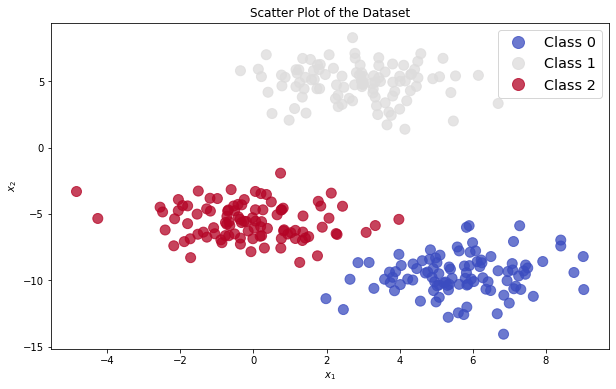

In [33]:
from sklearn import datasets
X, y = datasets.make_blobs(
    n_samples=300, n_features=2, centers=3, cluster_std=1.5, random_state=10
)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, cmap='coolwarm', alpha=0.75);
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Scatter Plot of the Dataset")
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0','Class 1', 'Class 2'], fontsize='x-large', markerscale=2)
plt.show();

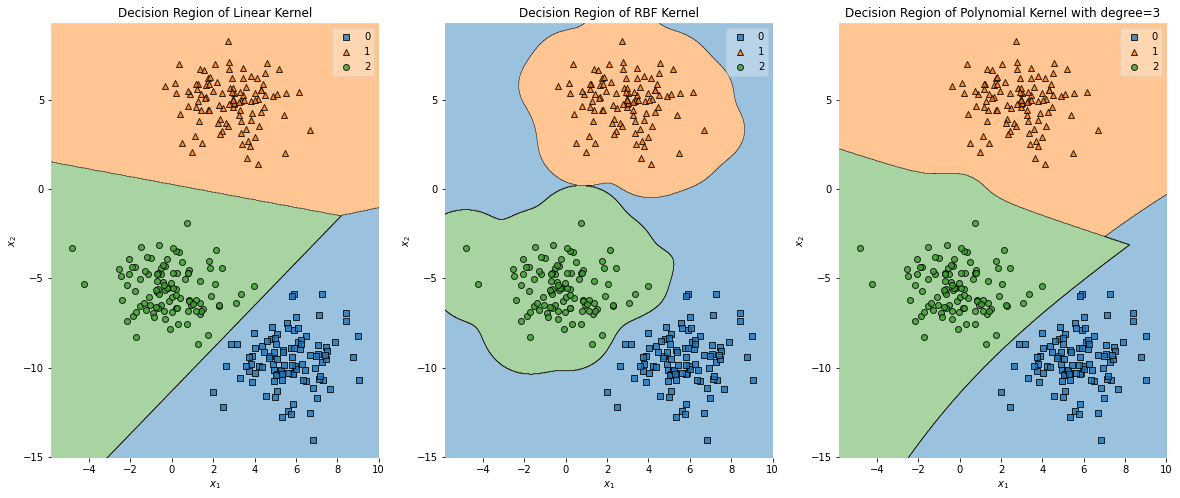

In [34]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(20,8))

#Linear Kernel
clf = SVC(kernel='linear', decision_function_shape='ovo')
clf.fit(X, y)

plt.subplot(1,3,1)
plot_decision_regions(X, y, clf=clf, legend=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Decision Region of Linear Kernel")

#RBF Kernel
clf = SVC(kernel='rbf', gamma=0.8, C=5, decision_function_shape='ovr')
clf.fit(X, y)

plt.subplot(1,3,2)
plot_decision_regions(X, y, clf=clf, legend=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Decision Region of RBF Kernel")

#Polynomial Kernel
clf = SVC(kernel='poly', degree=3, decision_function_shape='ovr')
clf.fit(X, y)

plt.subplot(1,3,3)
plot_decision_regions(X, y, clf=clf, legend=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Decision Region of Polynomial Kernel with degree=3")

plt.show()

<br>
<font face="XB Zar" size=4><div dir=rtl>
<center><font color="red" size="6">رگرسیون بردار پشتیبان (Support Vector Regression)</font> </center> <br> <br>
به طور کلی SVM یکی از محبوب‌ترین و پرکاربردترین الگوریتم‌های مورد استفاده است که معمولا برای طبقه‌بندی استفاده می‌شود. (Support Vector Classification)
    با این وجود، می‌توان از ایده Margin برای مسائل رگرسیون نیز استفاده نمود و بدین ترتیب Support Vector Regression (SVR) تعریف می‌شود. <br> <br>
    ایده‌ی مورد استفاده برای SVR، پیداکردن بهترین ابرصفحه‌ای است که همه نمونه‌ها در یک حاشیه با آستانه $\epsilon$ از این ابرصفحه قرار بگیرند. شکل زیر این ایده را به خوبی توضیح می‌دهد:
<div> <br>
<center>
<img src="resources/svr.png" width="500">
</center>
</div>    
<br><br><br>
    بدین ترتیب می‌توان مسئله بهینه‌سازی SVR را به صورت زیر تعریف نمود:
\begin{equation*}
    \begin{aligned}
        \min_{w,b} \quad & \frac{1}{2} ||w||_2 ^2\\
            \textrm{s.t.} \quad & |y^{(i)} - (w^T x^{(i)} + b)| \leq \epsilon \quad \forall i \in \{1,2,...,N\}\\
    \end{aligned}
\end{equation*}
<br><br>
    به دلایل مشابه با حالت Soft Margin Classifier، یعنی حساسیت این ابرصفحه به نمونه‌های Support و نیز احتمال وجود نمونه‌هایی که به دلایلی همچون نویز یا وجود داده‌ی پرت حاشیه زیادی ایجاد می‌کنند، می‌توان از Soft Support Vector Regression نیز استفاده نمود و با اضافه کردن Slack Variables ($\xi$)، مسئله بهینه‌سازی آن را به صورت زیر تغییر داد:
<div> <br>
<center>
<img src="resources/soft_svr.png" width="500">
</center>
</div>    
<br>
\begin{equation*}
    \begin{aligned}
        \min_{w,b} \quad & \frac{1}{2} ||w||_2 ^2 + C\sum_{i=1}^{N}{\xi_i}\\
        \textrm{s.t.} \quad & |y^{(i)} - (w^T x^{(i)} + b)| \leq \epsilon + \xi_i \\
        &\xi_i \geq 0 \quad \forall i \in \{1,2,...,N\}\\
    \end{aligned}
\end{equation*}
<br><br>
    همانند حالت طبقه‌بندی، در مسئله رگرسیون نیز به طریق مشابه می‌توان از کرنل‌ها استفاده نمود و برای SVR نیز کرنل‌های <code>rbf</code> و <code>polynomial</code> تعریف می‌شود. <br> <br>
    در ادامه سعی می‌کنیم با استفاده از <code>sklearn.svm</code> بر روی یک دیتاست یک‌بعدی(جهت نمایش‌دادن) ساختگی، اثر این کرنل‌ها را مقایسه کنیم:

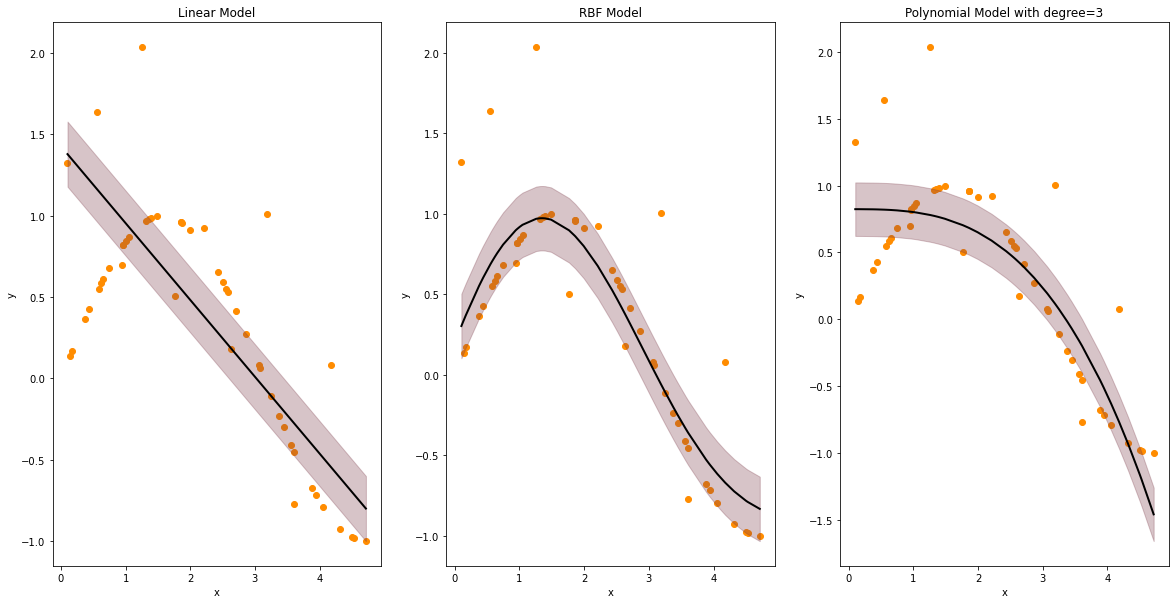

In [35]:
from sklearn.svm import SVR

X = np.sort(5 * np.random.rand(50, 1), axis=0)
y = np.sin(X).ravel() #y = sin(x)

#Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(10))

#Set the epsilon for the width of streets!
eps=0.2

#Linear Model
svr_lin = SVR(kernel='linear', C=1e3, epsilon=eps)
y_lin = svr_lin.fit(X, y).predict(X)

#RBF Model
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=eps)
y_rbf = svr_rbf.fit(X, y).predict(X)

#Polynomial Model
svr_poly = SVR(kernel="poly", C=100, degree=3, epsilon=eps)
y_poly = svr_poly.fit(X, y).predict(X)


plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_lin, color='k', lw=2)
plt.title('Linear Model')
plt.xlabel('x')
plt.ylabel('y')
plt.fill_between(X.ravel(), y_lin - eps, y_lin + eps, edgecolor='none', color='#7D3C4A', alpha=0.3)

plt.subplot(1,3,2)
plt.scatter(X, y, color='darkorange')
plt.plot(X, y_rbf, color='k', lw=2)
plt.title('RBF Model')
plt.xlabel('x')
plt.ylabel('y')
plt.fill_between(X.ravel(), y_rbf - eps, y_rbf + eps, edgecolor='none', color='#7D3C4A', alpha=0.3)

plt.subplot(1,3,3)
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_poly, color='k', lw=2)
plt.title('Polynomial Model with degree=3')
plt.xlabel('x')
plt.ylabel('y')
plt.fill_between(X.ravel(), y_poly - eps, y_poly + eps, edgecolor='none', color='#7D3C4A', alpha=0.3)
plt.show()

<font face="XB Zar" size=4><div dir=rtl>
    همانطور که مشخص است، با استفاده از کرنل <code>rbf</code> توانسته‌ایم ارتباط بین متغیر و خروجی را بهتر مدل‌سازی نماییم. همچنین باید بتوانیم که مقدار مناسب هایپرپارامترهای هر مدل را نیز بدست آوریم که با استفاده از Cross Validation انجام داده می‌شود و در ادامه توضیح داده خواهد شد.

<br>
<font face="XB Zar" size=4><div dir=rtl>
<center><font color="red" size="6">تنظیم هایپرپارامتر‌ها و انتخاب مدل</font> </center> <br> <br>
    ابتدا برای آشنایی با موضوع اعتبارسنجی(Validation) به این <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/blob/main/Jupyter_Notebooks/Chapter_03_Train_and_Evaluation/Validation.ipynb">نوتبوک</a> مراجعه فرمایید. در ادامه ما از دیتاست مصنوعی مارپیچی (<a href="https://en.wikipedia.org/wiki/Spiral">spiral</a>) استقاده میکنیم تا با این مبحث بهتر آشنا شوید .

In [36]:
%matplotlib nbagg

from ipywidgets import interact, FloatLogSlider, Checkbox
import math

from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV



def make_spiral(density=1, max_radius=6.5, c=0):
    """ Generate spiral dataset.
    
    Arguments:
        density (int)  : Density of the points
        maxRadius (float) : Maximum radius of the spiral
        c (int) : Class of this spiral
    
    Returns:
        array: Return spiral data and its class
    """
    
    # Spirals data and labels
    data, labels = [], []

    # Number of interior data points to generate
    N = 96 * density 

    # Generate points
    for i in range(0, N):
        angle = (i * math.pi) / (16 * density)
        # Radius is the maximum radius * the fraction of iterations left
        radius = max_radius * ((104 * density) - i) / (104 * density)

        # Get x and y coordinates
        x = radius * math.cos(angle)
        y = radius * math.sin(angle)

        data.append([x, y])
        labels.append([c])

    return data, labels

def make_spirals(density=1, max_radius=6.5):
    """ Generate two class spiral dataset.

    Arguments:
        density (int)  : Density of the points
        maxRadius (float) : Maximum radius of the spiral
    Returns:
        array: Return spirals data and its class
    """
    data , labels = [], []

    # First spirals data and class
    data1, labels1 = make_spiral(density, max_radius)

    # Construct complete two spirals dataset
    for d in data1:
        data.append(d)  # First spirals coordinate
        data.append([-d[0], -d[1]])  # Second spirals coordinate

    # Construct complete two spirals classes
    for lbl in labels1:
        labels.append(lbl)  # First spirals class
        labels.append([1])  # Second spirals class

    return np.array(data), np.array(labels).ravel()

<font face="XB Zar" size=4><div dir=rtl> 
    برای تولید این دیتاست از تابع نوشته‌شده  <code>make_spirals</code> استفاده می‌کنیم:

<IPython.core.display.Javascript object>


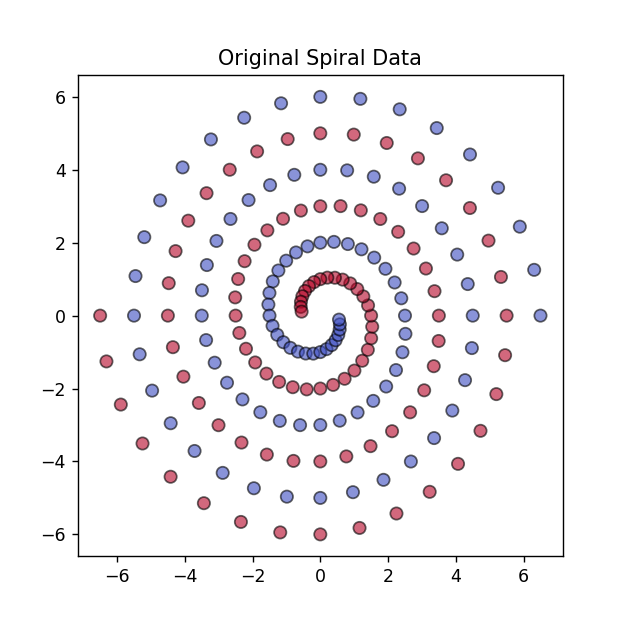

In [37]:
X, y = make_spirals()

# Plot spirals
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap=plt.cm.coolwarm, alpha=0.6)
plt.title("Original Spiral Data")
plt.show()

<font face="XB Zar" size=4><div dir=rtl> 
     در این قسمت می‌توان تاثیر هایپرپارامترهای $\gamma$ و $C$ را مشاهده کنید:

<IPython.core.display.Javascript object>


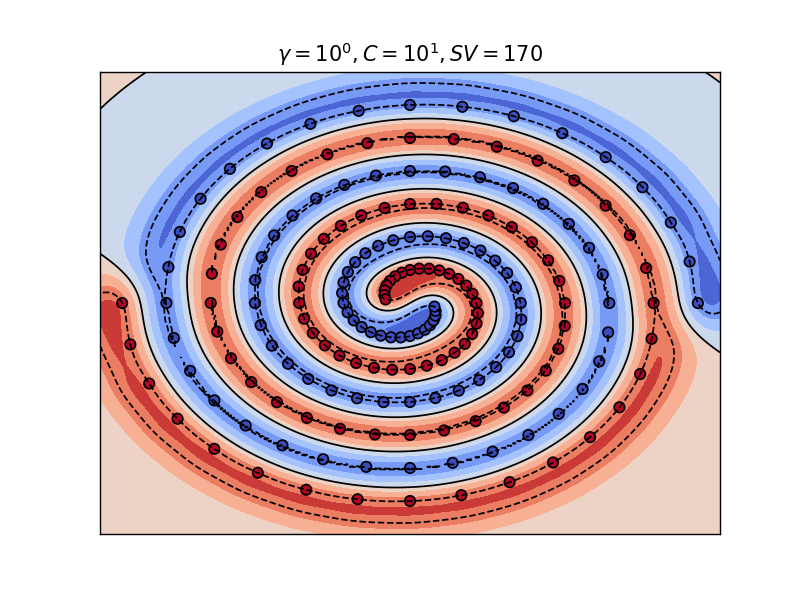

interactive(children=(FloatLogSlider(value=10.0, description='C:', max=5.0, min=-3.0, step=1.0), FloatLogSlide…

In [38]:
 fig, ax = plt.subplots(1)

X1, X2 = np.meshgrid(np.linspace(-7, 7, 200), np.linspace(-7, 7, 200))

def update_plot(C, gamma, show_svs, show_levels):
    ax.clear()
    
    # create and train SVM classifier
    clf = SVC(C=C, gamma=gamma)
    clf.fit(X, y)
    sv = clf.support_vectors_
    
    # compute contours
    Z = clf.decision_function(np.c_[X1.ravel(), X2.ravel()])
    Z = Z.reshape(X1.shape)

    # visualize parameter's effect on decision function
    ax.contourf(X1, X2, Z, cmap=plt.cm.coolwarm)
    
    # plot decision boundaries
    if show_levels:
        ax.contour(X1, X2, Z, linewidths=1, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    
    # plot data
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', cmap=plt.cm.coolwarm, alpha=1.0)
    
    # plot support vectors
    if show_svs:
        sv = clf.support_vectors_
        ax.scatter(sv[:, 0], sv[:, 1], s=150, facecolors='none', edgecolors='k')
    
    title = "$\gamma = 10^{:1.0g}, C = 10^{:1.0g}, SV = {:d}$"
    ax.set_title(title.format(np.log10(gamma), np.log10(C), len(sv)), size='large')
    ax.set_xticks(())
    ax.set_yticks(())
    plt.show()


C = FloatLogSlider(value=10, base=10, min=-3, max=5, step=1, description='C:')
gamma = FloatLogSlider(value=1, base=10, min=-3, max=5, step=1, description='gamma:')
show_svs = Checkbox(value=False, description='Show Support Vectors')
show_levels = Checkbox(value=True, description='Show Levels')

f = interact(update_plot, C=C, gamma=gamma, show_svs=show_svs, show_levels=show_levels);

<font face="XB Zar" size=4><div dir=rtl> 
می‌توانید با تغییر هایپرپارامترهای $C$ و $\gamma$ در اسلایدبارهای متناظر، تغییر ناحیه طبقه‌بندی را مشاهده کنید و همچنین Support Vectorهای آن را نمایش دهید.
    <br> در ادامه به ازای ترکیب‌های مختلف این هایپرپارامترها، ناحیه تقسیم‌بندی دو کلاس را همزمان ترسیم می‌کنیم تا بتوانیم آن‌ها را با یکدیگر مقایسه نماییم:

In [39]:
C_range = [0.1, 10, 1000]
gamma_range = [0.1, 1, 10]

classifiers = []

for C in C_range:
    for gamma in gamma_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X, y)
        classifiers.append((clf, C, gamma))

<IPython.core.display.Javascript object>


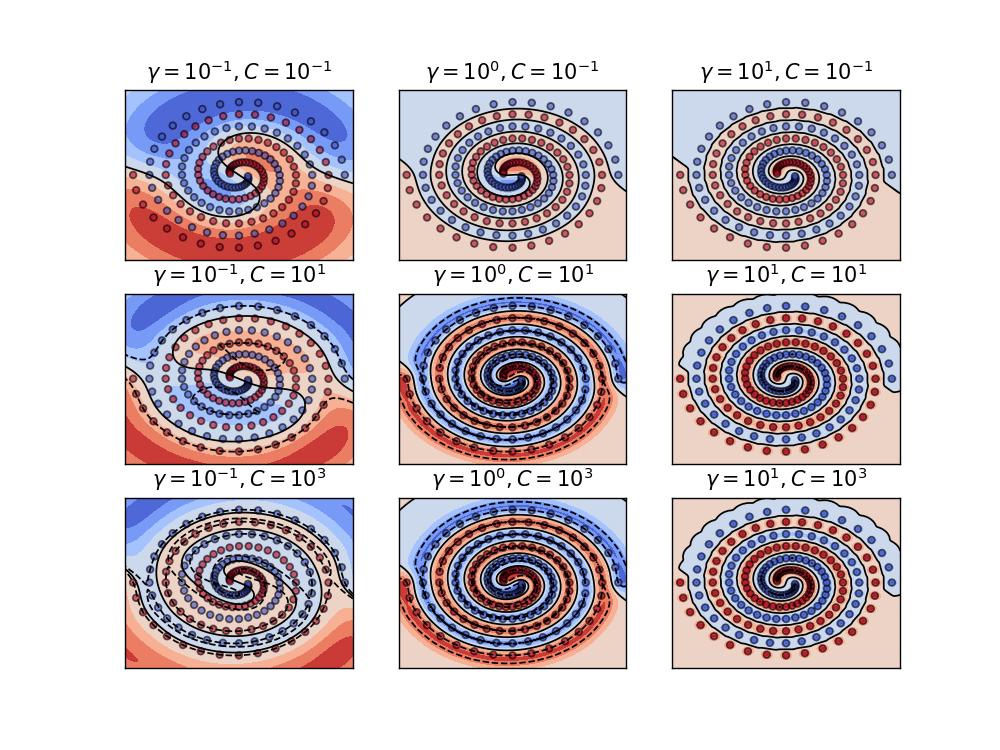

In [40]:
plt.figure(figsize=(8, 6))

X1, X2 = np.meshgrid(np.linspace(-7, 7, 200), np.linspace(-7, 7, 200))

for i, (clf, C, gamma) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[X1.ravel(), X2.ravel()])
    Z = Z.reshape(X1.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_range), len(gamma_range), i + 1)
    plt.title("$\gamma = 10^{%d}, C = 10^{%d}$" % (np.log10(gamma), np.log10(C)))

    # visualize parameter's effect on decision function
    plt.contourf(X1, X2, Z, cmap=plt.cm.coolwarm)
    plt.contour(X1, X2, Z, linewidths=1, colors='k', levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.scatter(X[:, 0], X[:, 1], s=15, c=y, edgecolors='k', cmap=plt.cm.coolwarm, alpha=0.6)
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')
    
plt.show();

<font face="XB Zar" size=4><div dir=rtl>
    آیا از شکل‌های بالا اثر این هایپرپارامترها را می‌توانید تشخیص دهید؟ <br>
    حال در این قسمت ما سعی می‌کنیم با استفاده از روش k-fold CV به صورت Grid Search بهترین $\gamma$ و $C$ را پیدا کنیم: 

In [41]:
X1 = np.random.randn(10, 2)

cv = KFold(n_splits=5)

for train_idx, val_idx in cv.split(X1):
    print("Train = {} | Validation ={}".format(train_idx, val_idx))

Train = [2 3 4 5 6 7 8 9] | Validation =[0 1]
Train = [0 1 4 5 6 7 8 9] | Validation =[2 3]
Train = [0 1 2 3 6 7 8 9] | Validation =[4 5]
Train = [0 1 2 3 4 5 8 9] | Validation =[6 7]
Train = [0 1 2 3 4 5 6 7] | Validation =[8 9]


In [42]:
X1 = np.random.randn(9, 2)
y1 = np.array([0, 0, 0, 1, 1, 1, 1, 1, 1])

cv = KFold(n_splits=3)

for trn_idx, val_idx in cv.split(X1, y1):
    print("Train={} | Valid={} | Labels={}, {}".format(trn_idx, val_idx, y1[trn_idx], y1[val_idx]))

Train=[3 4 5 6 7 8] | Valid=[0 1 2] | Labels=[1 1 1 1 1 1], [0 0 0]
Train=[0 1 2 6 7 8] | Valid=[3 4 5] | Labels=[0 0 0 1 1 1], [1 1 1]
Train=[0 1 2 3 4 5] | Valid=[6 7 8] | Labels=[0 0 0 1 1 1], [1 1 1]


In [43]:
# 1: split data to train and validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 2: specify range of hyper-parameters
C_range = np.logspace(-3, 5, 9)         # 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5
gamma_range = np.logspace(-3, 5, 9)     # 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5
param_grid = dict(gamma=gamma_range, C=C_range)

# 3: create classifier
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)

# 4: Train
grid.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04,
       1.e+05]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04,
       1.e+05])})

<IPython.core.display.Javascript object>


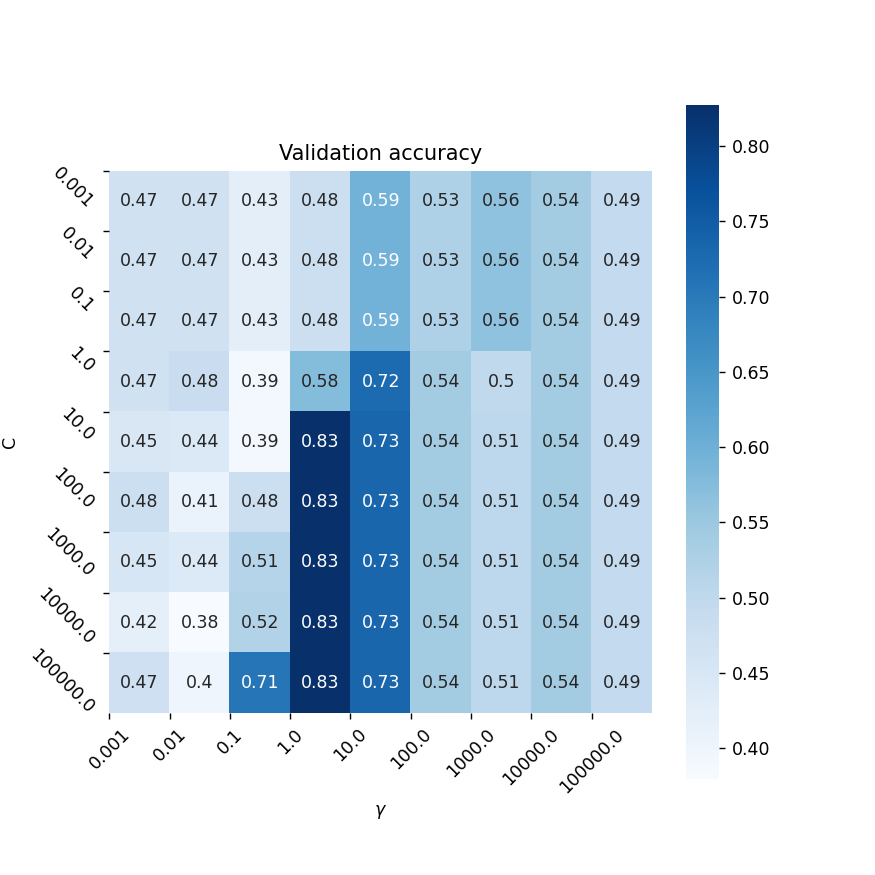

The best parameters are {'C': 10.0, 'gamma': 1.0} with a score of 0.83


In [44]:
scores = grid.cv_results_['mean_test_score'].reshape(len(C_range), len(gamma_range))

plt.figure(figsize=(7, 7))

# Draw heatmap of the validation accuracy as a function of gamma and C
import seaborn as sns
sns.heatmap(scores, annot=True, cmap='Blues', square=True);

plt.xlabel('$\gamma$')
plt.ylabel('C')
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range, rotation=-45)
plt.title('Validation accuracy')
plt.show();

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

<br>
<font face="XB Zar" size=4><div dir=rtl>
<center><font color="red" size="6">معیارهای ارزیابی مدل‌ها</font> </center> <br> <br>
در این بخش، با معیار های مختلف ارزیابی مدل ها در مسائل دسته‌بندی و رگرسیون آشنا می‌شویم. <br> <br>
<font color="red" size=5> آشنایی با دیتاست </font> <br> <br>
      دیتاستی که در این بخش استفاده خواهد شد، دیتاست MNIST است که شامل 70000 تصویر از عددهای تک‌رقمی دست‌نویس هستند که می‌توانید آن را با استفاده از تابع 
    <code>fetch_openml</code> دانلود و استفاده نمایید.
      <br />

In [45]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [46]:
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
print(X.shape, y.shape)

(70000, 784) (70000,)


<font face="XB Zar" size=4> <div dir=rtl>
    همانطورکه مشخص است داده‌های ما عکس‌های ۲۸ در ۲۸ هستند. در ادامه یکی از نمونه‌ها را نمایش می‌دهیم:

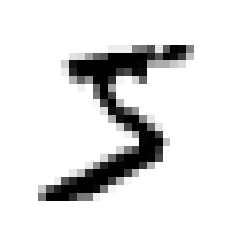

In [47]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")
  

digit = X[0]
plot_digit(digit)

<font face="XB Zar" size=4> <div dir=rtl>
<font color="red" size=5> آموزش دادن یک Binary Classifier </font> <br><br>
    در این بخش یک binary classifier که تشخیص می‌دهد یک تصویر ۵ است یا نه را آموزش دهیم.
<br/>

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

y_train_5

array([False, False, False, ..., False, False, False])

In [47]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='rbf', C = 0.03, random_state=42)
svm_clf.fit(X_train, y_train_5)

SVC(C=0.03, random_state=42)

<font face="XB Zar" size=4><div dir=rtl>
می‌توانیم مدل آموزش داده‌شده را روی تصویری که بالاتر نمایش دادیم تست کنیم:

In [48]:
svm_clf.predict([digit])

array([ True])

<font face="XB Zar" size=4> <div dir=rtl>
<font color="red" size=5> محاسبه دقت </font> <br><br>
    دقت این classifier را به کمک تابع <code>accuracy_score</code> از ماژول 
    <code>sklearn.metrics</code>
    به دست می‌آوریم: <br/>

In [50]:
from sklearn.metrics import accuracy_score
svm_clf_predictions = svm_clf.predict(X_test)
accuracy = accuracy_score(y_test_5, svm_clf_predictions)

print("Accuracy of the 5 classifier is:", accuracy)

Accuracy of the 5 classifier is: 0.9729714285714286


<font face="XB Zar" size=4><div dir=rtl>
    به دقت بالای 97 درصد رسیدیم! چقدر خوب! <br> <br>
    قبل از اینکه خیلی هیجان زده شوید،‌بگذارید تا یک مدل بسیار ساده را آموزش دهیم تا دقت آن را بسنجیم و با مدل خود مقایسه کنیم.
    این مدل ساده به گونه ای کار می‌کند که هر تصویری ببیند، آن را در دسته‌ی "غیر 5" پیش‌بینی می‌کند:

In [51]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [52]:
never_5_clf = Never5Classifier()
never_5_clf_predictions = never_5_clf.predict(X_test)
accuracy_score(y_test_5, never_5_clf_predictions)

0.9081714285714285

<font face="XB Zar" size=4> <div dir=rtl>
خب همانطور که مشخص است، این دسته‌بند به دقت بالای ۹۰ درصد رسید! خیلی هم تعجب برانگیز نیست؛ زیرا فقط حدود ۱۰ درصد از داده ها لیبل شان ۵ بوده است، و آن ها نیز اشتباه تشخیص داده شده اند.

<font face="XB Zar" size=4> <div dir=rtl>
<font color="red" size=5> Confusion Matrix </font> <br><br>
    یک روش خیلی بهتر برای ارزیابی مدل،‌نگاه به confusion matrix آن است که به ما نشان می‌دهد که هر دسته چند بار در دسته درست و چند بار در دسته های اشتباه طبقه‌بندی شده است. 
    هر سطر در این ماتریس نشان‌دهنده‌ی کلاس واقعی و هر ستون نشان‌دهنده کلاسی است که مدل ما پیش‌بینی کرده است. <br> <br>
    می‎توان با استفاده از تابع <code>confusion_matrix</code> از ماژول <code>sklearn.metrics</code> این ماتریس را نمایش داد:

In [53]:
from sklearn.metrics import confusion_matrix

svm_confusion_matrix = confusion_matrix(y_test_5, svm_clf_predictions)
print(svm_confusion_matrix)

[[15887     6]
 [  467  1140]]


<font face="XB Zar" size=4> <div dir=rtl>
اطلاعاتی که confusion matrix از مدل ما می‌دهد عبارت هستند از:
          <ul>
              <li>
                اندیس [0,0]: 15887 عکسی که لیبل آن ها "غیر 5" بوده است به درستی "غیر 5" تشخیص داده شده اند. (True Negative)
              </li>
              <li>
                اندیس [0,1]: 6 عکسی که لیبل آن ها "غیر 5" بوده است به اشتباه "5" تشخیص داده شده اند. (False Positive)
              </li>
              <li>
                اندیس [1,0]: 467 عکسی که لیبل آن ها "5" بوده است به اشتباه "غیر 5" تشخیص داده شده اند. (False Negative)
              </li>
              <li>
                اندیس [1,1]: 1140 عکسی که لیبل آن ها "5" بوده است به درستی "5" تشخیص داده شده اند. (True Positive)
              </li>
          </ul>
<br> برای یک دسته بند ایده‌آل، خانه‌های غیرقطری confusion matrix همگی 0 هستند. <br><br>
همانطور که متوجه شده اید، confusion matrix اطلاعات زیادی به ما می‌دهد. یکی از آن ها، دقت پیش‌بینی های positive است که به آن precision می‌گوییم:
    $$ Precision = \frac{TP}{TP + FP} $$ <br>
    اگر یک پیش بینی انجام دهیم که positive باشد، آنگاه precision برابر با ۱ می‌شود. به همین دلیل این متریک را با متریک دیگری به اسم recall  می‌سنجیم:
    $$ Recall (Sensitivity) = \frac{TP}{TP + FN} $$ <br><br>
    در کتابخانه سایکیت-لرن نیز می‌توانیم به آن‌ها از طریق ماژول <code>sklearn.metrics</code> و از طریق توابع <code>precision_score</code> و <code>recall_score</code> دسترسی داشته باشیم:

In [54]:
from sklearn.metrics import precision_score, recall_score
svm_y_train_pred = svm_clf.predict(X_train)
print('Precision =', precision_score(y_train_5, svm_y_train_pred))
print('Recall =', recall_score(y_train_5, svm_y_train_pred))

Precision = 0.9943045563549161
Recall = 0.704844878878028


<font face="XB Zar" size=4><div dir=rtl>
دسته‌بند ما الان آنقدر هم خوب بنظر نمی‌آید! این دسته‌بند 70 درصد عکس‌هایی که ۵ بوده است را درست دسته‌بندی کرده است. <br> <br>
یک معیار دیگر که برای ارزیابی مدل استفاده می‌شود، F1 score نام دارد که به صورت زیر تعریف می‌شود: <br>
    $$ F1\_score = \frac{2}{\frac{1}{precision} + \frac{1}{recall}} $$

In [57]:
from sklearn.metrics import f1_score
print("F1_score =", f1_score(y_train_5, svm_y_train_pred))

F1_score = 0.8249191743347426


<font face="XB Zar" size=4><div dir=rtl>
این متریک دسته‌بندهایی که precision و recall نزدیکی دارند را دوست دارد. استفاده از این متریک خیلی وابسته به مسئله است. ممکن است در یک مسئله precision برای ما اهمیت زیادی داشته باشد یا در مساله دیگری بخواهیم recall بالایی داشته باشیم.

<font face="XB Zar" size=4> <div dir=rtl>
<font color="red" size=5> Precision/Recall tradeoff </font> <br><br>
    دسته‌بندها،‌برای هر داده که دسته‌بندی می‌کنند یک امتیاز (score) مشخص می‌کنند و بر اساس یک آستانه (threshold) آن را به دسته مثبت یا دسته منفی اختصاص می‌دهند. در مثال‌هایی که بالاتر داشتیم، امتیاز ما درواقع همان مقدار تابع طبقه‌بند $f(x)$ بود. مقدار آستانه نیز برابر با 0 بود و دسته‌بندی با توجه به علامت تابع طبقه‌بند برای هر نمونه استفاده می‌شد؛ اما می‌توان این مقدار آستانه را تغییر داد و در نتیجه، پیش‎بینی‌هایی با امتیاز نزدیک به این آستانه تغییر می‎کنند و متناظرا متریک‌های ما نیز تغییر خواهند نمود. این موضوع منجر به یک tradeoff بین این دو متریک خواهد شد که در ادامه آن را نشان می‌دهیم:

In [58]:
#Get the scores for train set predictions
svm_train_scores = svm_clf.decision_function(X_train)

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, svm_train_scores)

thresholds

array([-2.82740324, -2.72198694, -2.66664357, ...,  1.85226769,
        1.89011781,  1.96884864])

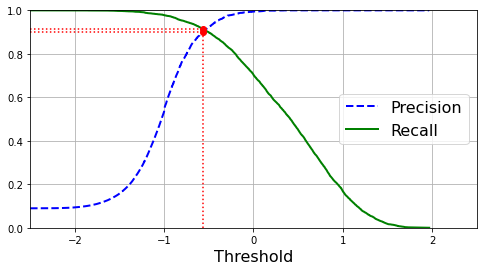

In [59]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                             
    plt.axis([-2.5, 2.5, 0, 1])             



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
plt.plot([-2.5, threshold_90_precision], [0.9, 0.9], "r:")                                
plt.plot([-2.5, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             
plt.show()

<font face="XB Zar" size=4><div dir=rtl>
همانطور که از نمودار بالا مشخص است،‌با جابجا کردن این threshold، نمی‌توان هم precision و هم recall را زیاد کرد. پس اینجا مسئله‌ای مطرح می‌شود که  threshold را در کجا قرار دهیم،‌که جواب این سوال،‌وابسته به مسئله ما متقاوت است و باید با توجه به هدف خود آن را تنظیم کنیم. <br><br>
    همچنین می‌توان نمودار precision برحسب recall را کشید و از روی آن تصمیم گیری کرد:

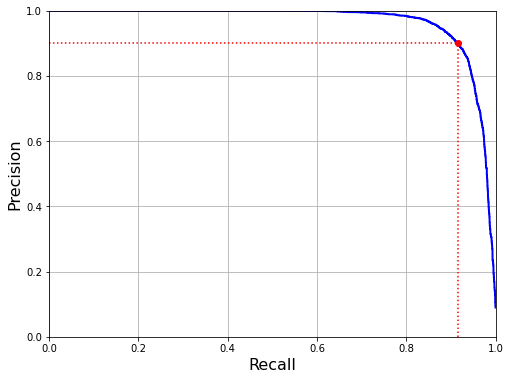

In [60]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
plt.show()

<font face="XB Zar" size=4><div dir=rtl>
حال بطور مثال در مساله ای که داریم،‌می‌خواهیم حتما به recall برابر با ۹۰ درصد برسیم. پس برای پیداکردن آستانه موردنظر به صورت زیر عمل می‌کنیم:

In [61]:
threshold_90_recall = thresholds[np.argmax(recalls >= 0.90)]
print("Threshold value for 90% recall =", threshold_90_recall)

Threshold value for 90% recall = -2.8274032359600163


<font face="XB Zar" size=4><div dir=rtl>
    می‌توانیم نتیجه بالا را نیز چک کنیم:

In [63]:
svm_y_train_pred_90 = (svm_train_scores >= threshold_90_precision)
print("Precision =", precision_score(y_train_5, svm_y_train_pred_90))
print("Recall =", recall_score(y_train_5, svm_y_train_pred_90))

Precision = 0.9001044932079415
Recall = 0.9152146196345091


<font face="XB Zar" size=4><div dir=rtl>
همانطور که مشاهده می‌شود، به ازای این مقدار آستانه معیارهای مورد نظر ما مقادیر به مراتب بهتری نسبت به آستانه اولیه 0 دارند. <br><br>
<font color="red" size=5> منحنی ROC (ROC Curve) </font> <br><br>
    این ابزار نیز برای دسته‌بند های باینری زیاد استفاده می‌شود و شباهت زیادی به precision-recall curve دارد، با این تفاوت که recall را بر حسب false positive rate نمایش می‌دهد:

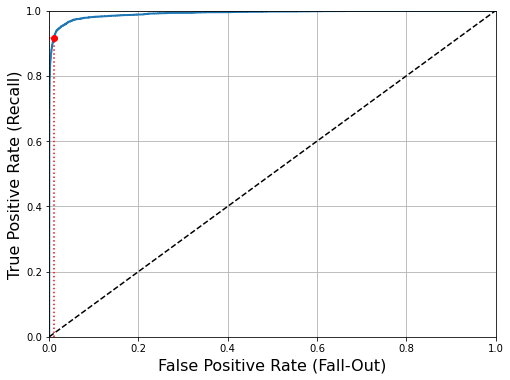

In [65]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, svm_train_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

plt.figure(figsize=(8, 6))                                    
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:") 
plt.plot([fpr_90], [recall_90_precision], "ro")              
plt.show()

<font face="XB Zar" size=4> <div dir=rtl>
در این جا هم یک tradeoff بین recall و false positive rate داریم.
خط‌چین نمایش داده شده برای یک دسته‌بند کاملا رندوم است و یک دسته‌بند خوب،‌ در دورترین حالت نسبت به آن خط چین قرار می‌گیرد.

<font face="XB Zar" size=4> <div dir=rtl>
<font color="red" size=5> مساحت زیر منحنی (AUC) </font> <br><br>
یک راه دیگر برای ارزیابی و مقایسه مدل‌ها، مقایسه کردن مساحت زیر نمودار ROC Curve است که به این متریک AUC گفته می‌شود.


In [68]:
from sklearn.metrics import roc_auc_score
print("AUC =", roc_auc_score(y_train_5, svm_train_scores))

AUC = 0.9916184997517591


<font face="XB Zar" size=4><div dir=rtl>
این متریک برای دسته‌بند SVM ما عدد بالایی است! <br> <br>
    بنابراین با آشنایی با این معیارها، متوجه می‌شویم که صرفا توجه کردن به دقت مدل شاید کافی نباشد و بهتر است که سایر متریک‌های گفته‌شده را نیز بررسی نماییم.